In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
stock_prices_df = pd.read_csv('drive/MyDrive/DataScience/Stock/company_stock.csv')
nepse_data_df = pd.read_csv('drive/MyDrive/DataScience/Stock/nepse_index_history.csv')
print("Columns in stock_prices_df:", stock_prices_df.columns)
print("Columns in nepse_data_df:", nepse_data_df.columns)


Columns in stock_prices_df: Index(['S.N.', 'Traded Companies', 'No. Of Transaction', 'Max Price',
       'Min Price', 'Closing Price', 'Traded Shares', 'Amount',
       'Previous Closing', 'Difference Rs.', 'Date'],
      dtype='object')
Columns in nepse_data_df: Index(['SN', 'open', 'high', 'low', 'close', 'change', 'pct_change',
       'turnover', 'date'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
stock_prices_df = pd.read_csv('drive/MyDrive/DataScience/Stock/company_stock.csv')
nepse_data_df = pd.read_csv('drive/MyDrive/DataScience/Stock/nepse_index_history.csv')

# Rename the 'Date' column in stock_prices_df to 'date'
stock_prices_df = stock_prices_df.rename(columns={'Date': 'date'})

# Merge the DataFrames based on the 'date' column, using a left join to keep all Nepse data
merged_df = pd.merge(stock_prices_df, nepse_data_df, on='date', how='left')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)


<ipython-input-32-c973b3b04c31>:7: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


Outliers in S.N.:
Series([], Name: S.N., dtype: int64)


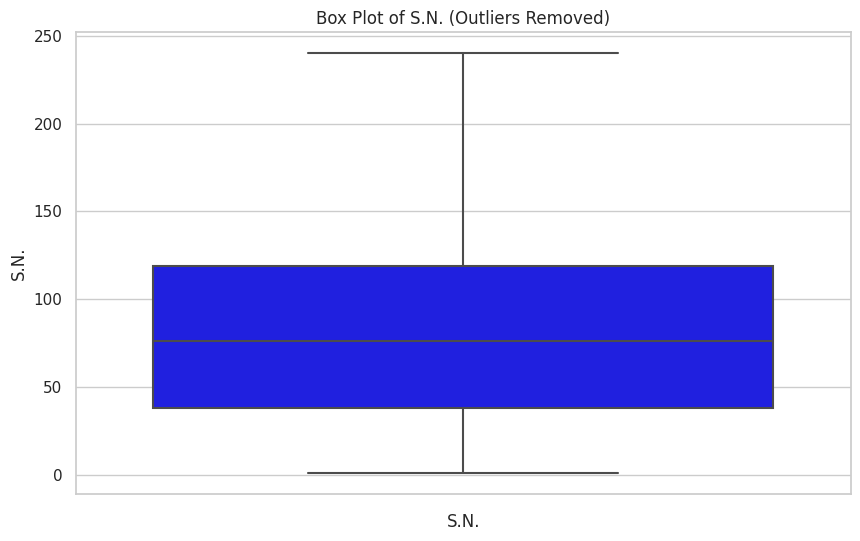

Outliers in No. Of Transaction:
101       286
216       328
266       232
484       338
526       209
         ... 
163714    236
164414    248
164627    249
164629    195
164693    213
Name: No. Of Transaction, Length: 22250, dtype: int64


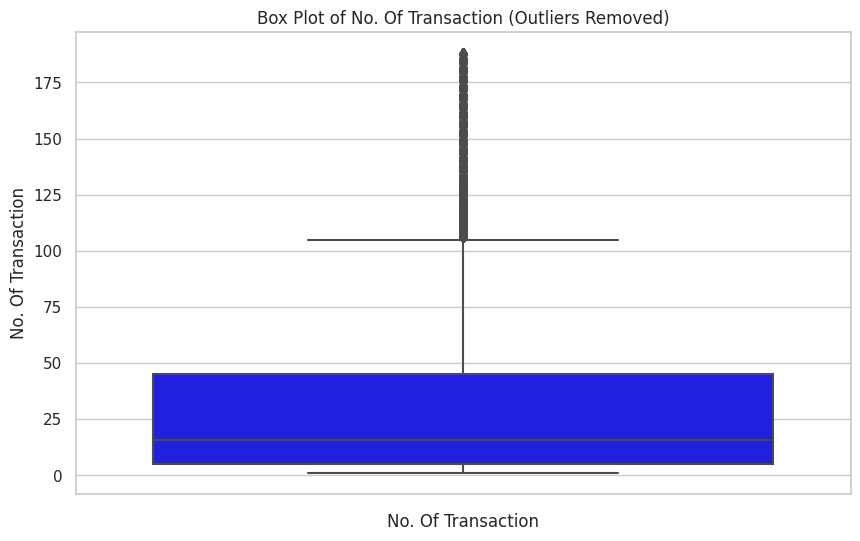

Outliers in Max Price:
53        2000.0
178       3532.0
182       2100.0
217       2550.0
227       2055.0
           ...  
164668    2760.0
164677    2180.0
164688    3519.0
164705    2318.0
164720    2020.0
Name: Max Price, Length: 12299, dtype: float64


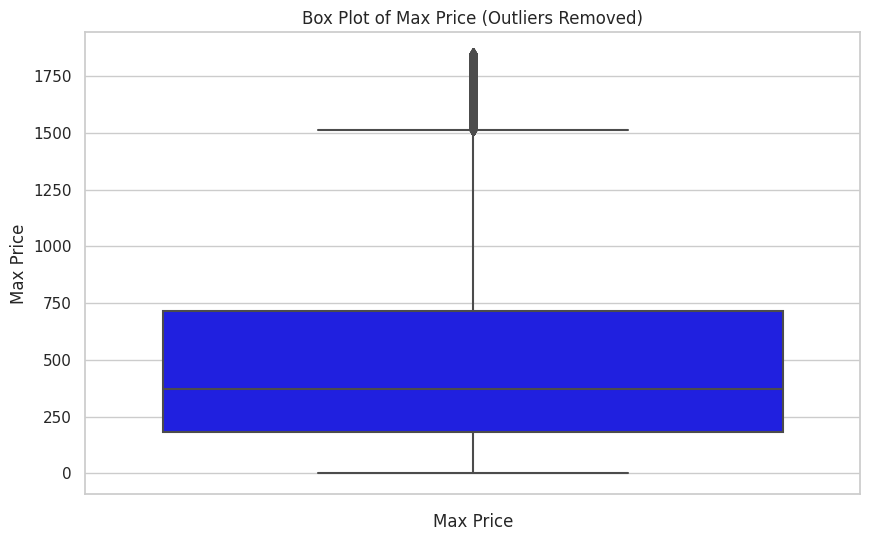

Outliers in Min Price:
53        1935.0
72        1794.0
156       1800.0
178       3300.0
182       2071.0
           ...  
164668    2626.0
164677    2100.0
164688    3304.0
164705    2273.0
164720    2000.0
Name: Min Price, Length: 12364, dtype: float64


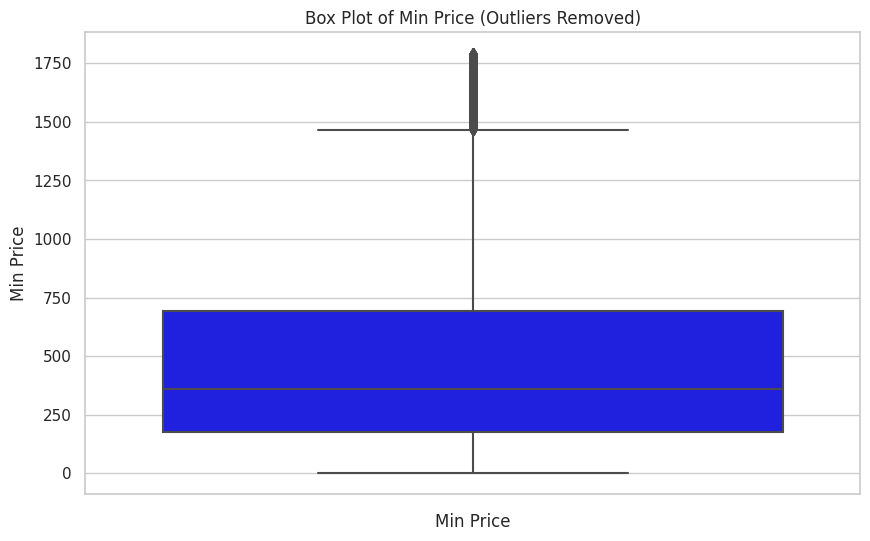

Outliers in Closing Price:
53        2000.0
72        1830.0
178       3462.0
182       2095.0
217       2530.0
           ...  
164668    2630.0
164677    2175.0
164688    3450.0
164705    2273.0
164720    2000.0
Name: Closing Price, Length: 12309, dtype: float64


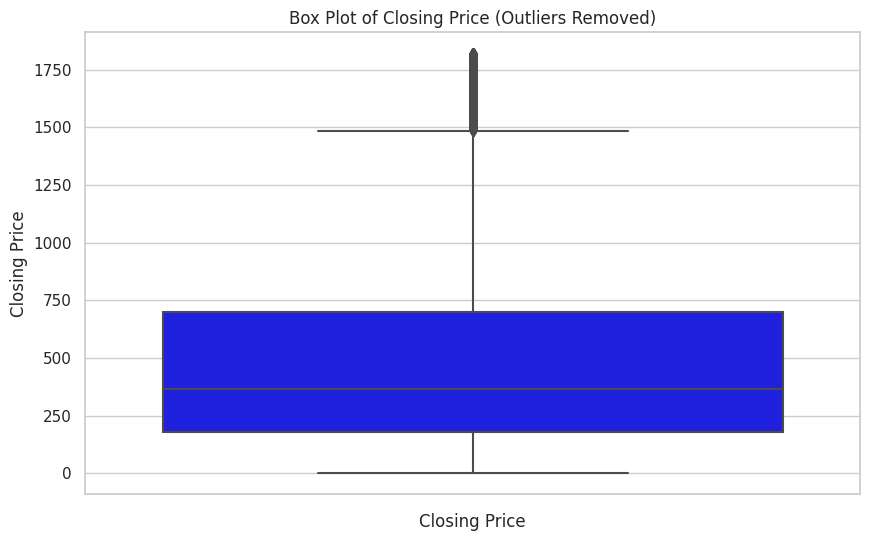

Outliers in Traded Shares:
48        47585.0
101       41493.0
127       68620.0
216       93162.0
226       41037.0
           ...   
164583    49547.0
164627    38768.0
164666    88815.0
164681    37510.0
164682    69007.0
Name: Traded Shares, Length: 22006, dtype: float64


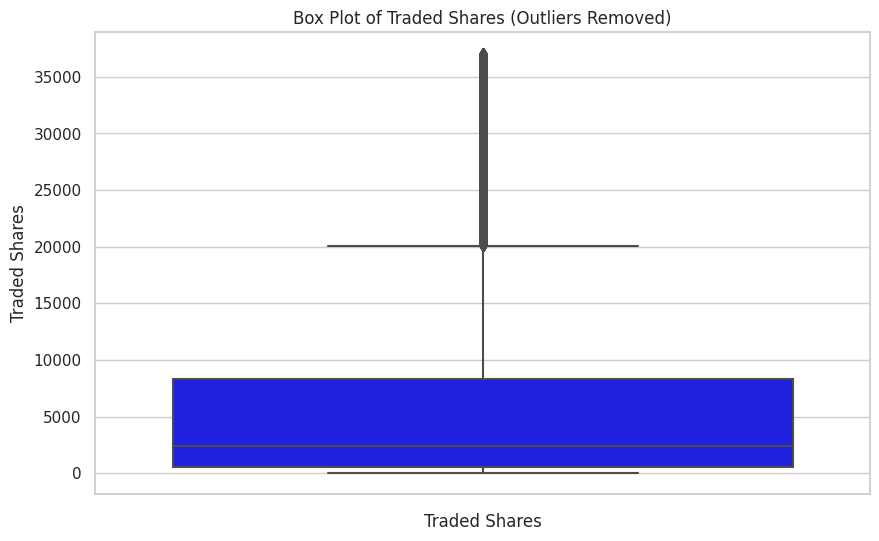

Outliers in Amount:
96        16700340.0
177       17365678.0
216       55775872.0
233       63102576.0
436       28439051.0
             ...    
164627    18856015.0
164666    45904411.0
164681    24114630.0
164682    23550144.0
164684    22657080.0
Name: Amount, Length: 22243, dtype: float64


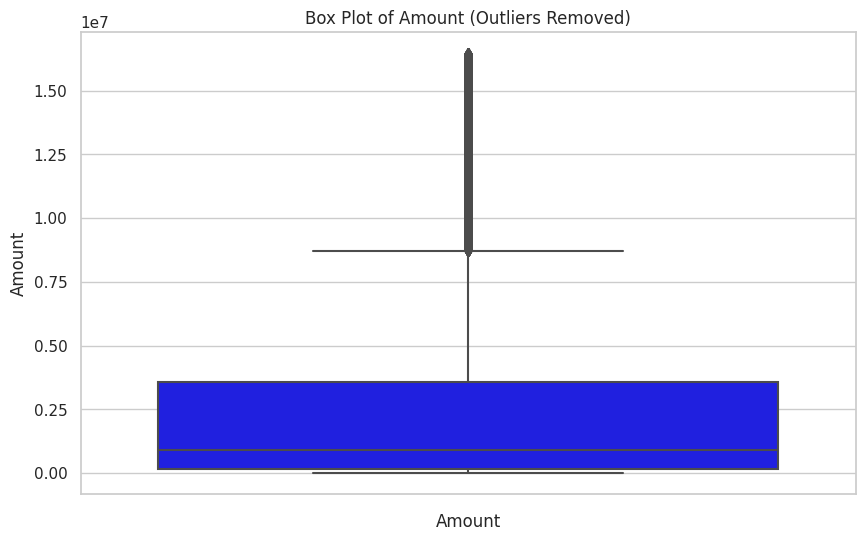

Outliers in Previous Closing:
53        1950.0
72        1830.0
156       1824.0
178       3280.0
182       2120.0
           ...  
164668    2575.0
164677    2110.0
164688    3396.0
164705    2186.0
164720    1975.0
Name: Previous Closing, Length: 12291, dtype: float64


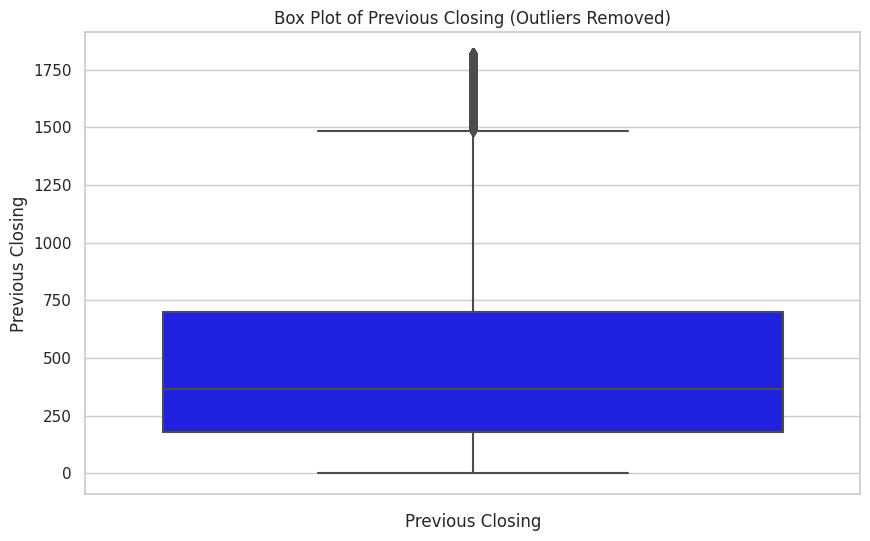

Outliers in Difference Rs.:
53         50.0
97         35.0
104       -21.0
135        25.0
149        32.0
          ...  
164700    100.0
164705     87.0
164706     25.0
164709     21.0
164720     25.0
Name: Difference Rs., Length: 28160, dtype: float64


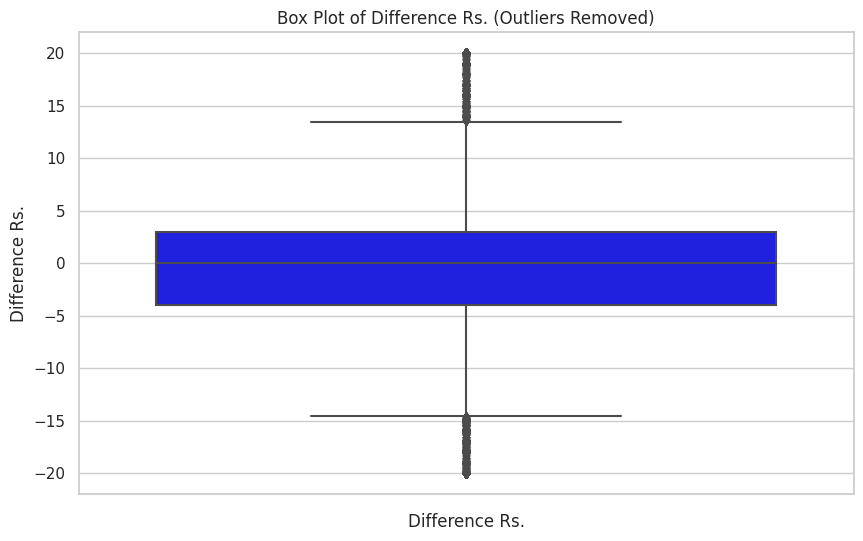

Outliers in SN:
Series([], Name: SN, dtype: float64)


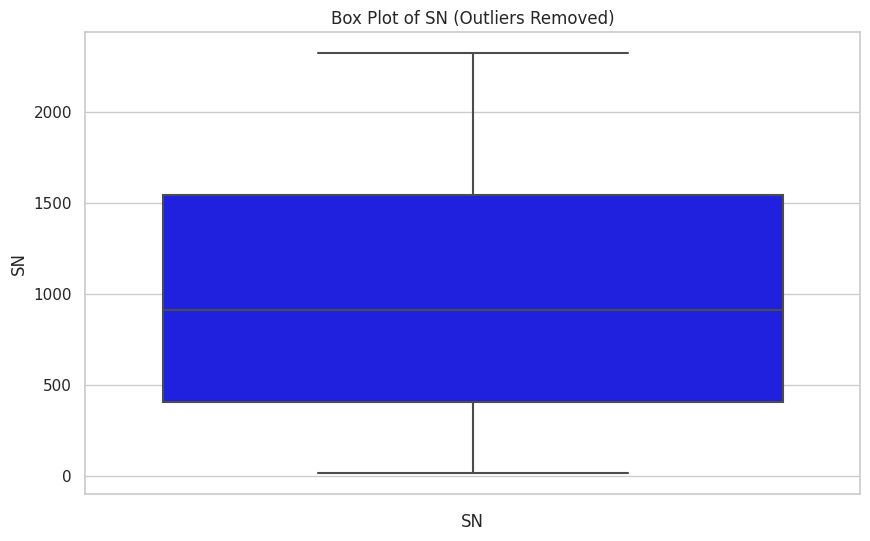

Outliers in change:
1614      39.38
1615      39.38
1616      39.38
1617      39.38
1618      39.38
          ...  
162054    37.95
162055    37.95
162056    37.95
162057    37.95
162058    37.95
Name: change, Length: 21437, dtype: float64


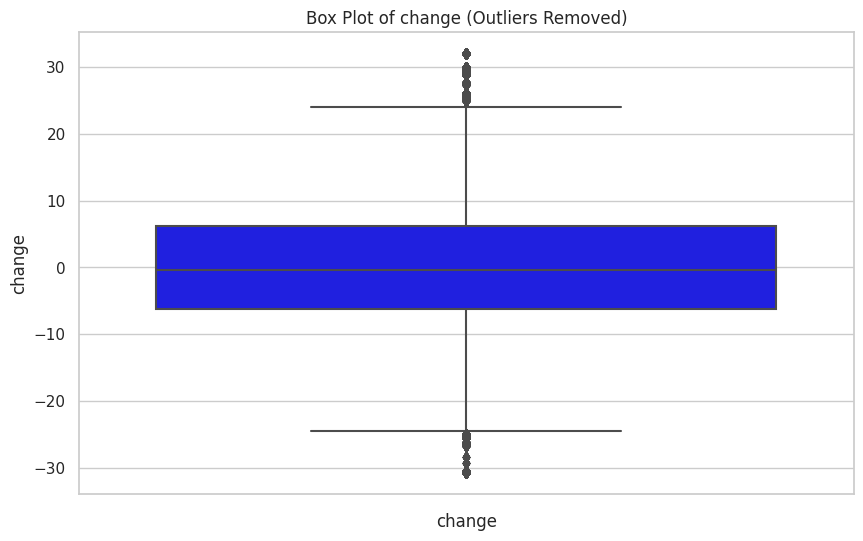

Outliers in pct_change:
1614      4.52
1615      4.52
1616      4.52
1617      4.52
1618      4.52
          ... 
163302    2.78
163303    2.78
163304    2.78
163305    2.78
163306    2.78
Name: pct_change, Length: 9134, dtype: float64


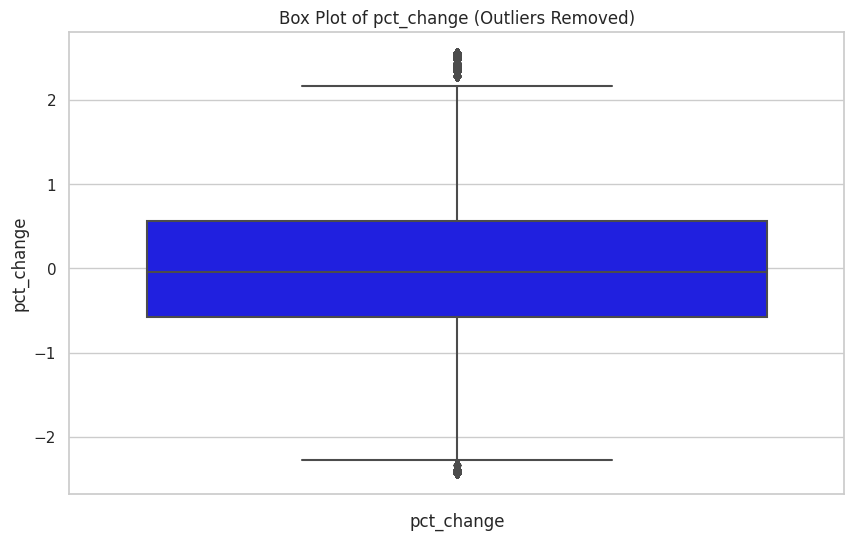

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data (replace 'merged_data.csv' with your actual file path)
merged_df = pd.read_csv('merged_data.csv')

numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and print the outlier values
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f'Outliers in {column_name}:\n{outliers[column_name]}')

    # Remove outliers and return the cleaned DataFrame
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Create box plots for each numerical column and remove outliers
for column_name in numerical_columns:
    # Remove outliers and print their values
    cleaned_df = remove_outliers_iqr(merged_df, column_name)

    # Create a box plot without outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cleaned_df, y=column_name, color='blue')
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name} (Outliers Removed)')
    plt.show()


<ipython-input-41-c3b2141e9daa>:7: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


Outliers in S.N.:
Series([], Name: S.N., dtype: int64)


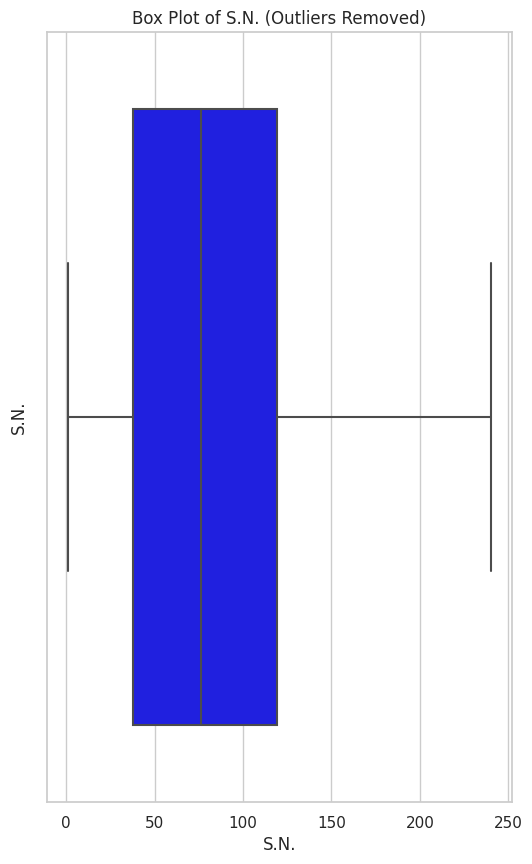

Outliers in No. Of Transaction:
101       286
216       328
266       232
484       338
526       209
         ... 
163714    236
164414    248
164627    249
164629    195
164693    213
Name: No. Of Transaction, Length: 22250, dtype: int64


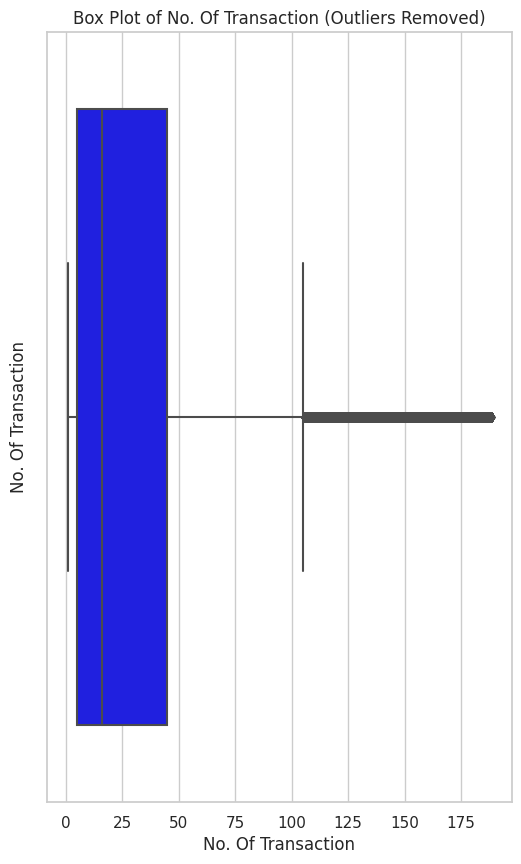

Outliers in Max Price:
53        2000.0
178       3532.0
182       2100.0
217       2550.0
227       2055.0
           ...  
164668    2760.0
164677    2180.0
164688    3519.0
164705    2318.0
164720    2020.0
Name: Max Price, Length: 12299, dtype: float64


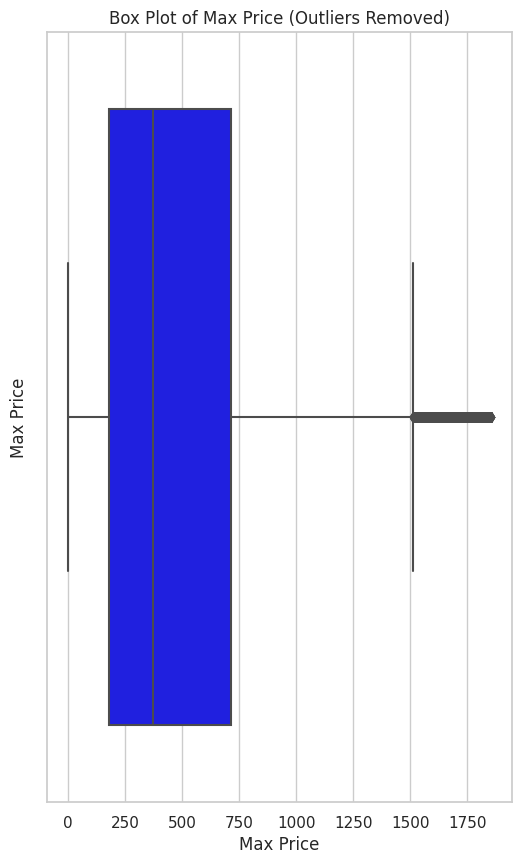

Outliers in Min Price:
53        1935.0
72        1794.0
156       1800.0
178       3300.0
182       2071.0
           ...  
164668    2626.0
164677    2100.0
164688    3304.0
164705    2273.0
164720    2000.0
Name: Min Price, Length: 12364, dtype: float64


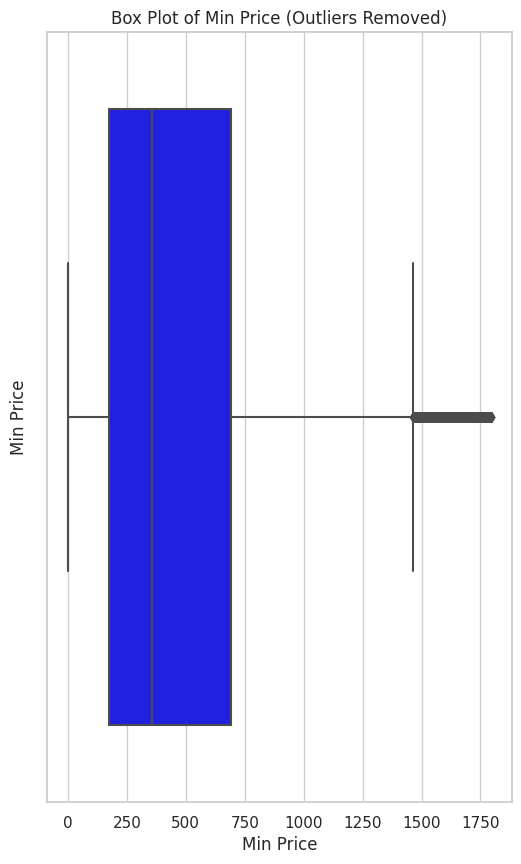

Outliers in Closing Price:
53        2000.0
72        1830.0
178       3462.0
182       2095.0
217       2530.0
           ...  
164668    2630.0
164677    2175.0
164688    3450.0
164705    2273.0
164720    2000.0
Name: Closing Price, Length: 12309, dtype: float64


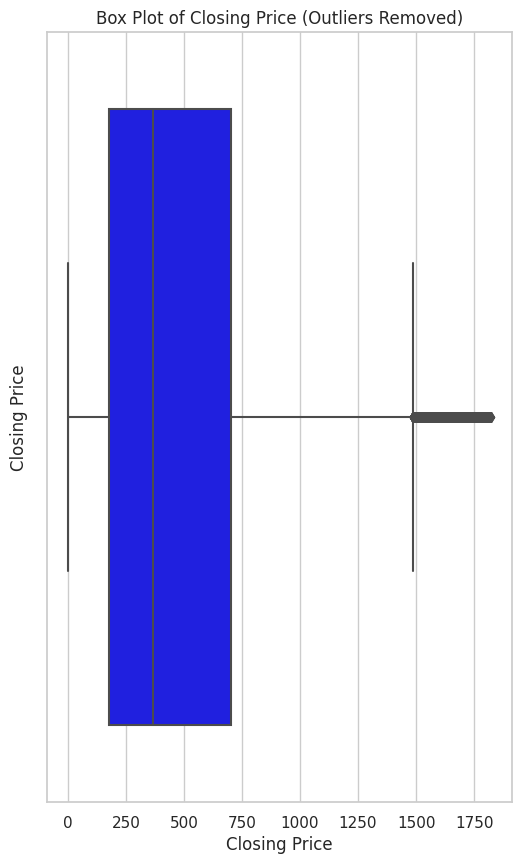

Outliers in Traded Shares:
48        47585.0
101       41493.0
127       68620.0
216       93162.0
226       41037.0
           ...   
164583    49547.0
164627    38768.0
164666    88815.0
164681    37510.0
164682    69007.0
Name: Traded Shares, Length: 22006, dtype: float64


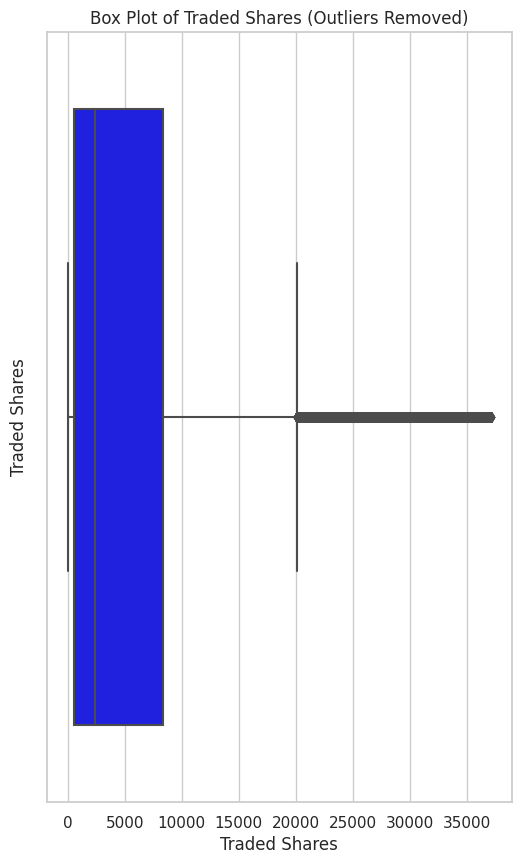

Outliers in Amount:
96        16700340.0
177       17365678.0
216       55775872.0
233       63102576.0
436       28439051.0
             ...    
164627    18856015.0
164666    45904411.0
164681    24114630.0
164682    23550144.0
164684    22657080.0
Name: Amount, Length: 22243, dtype: float64


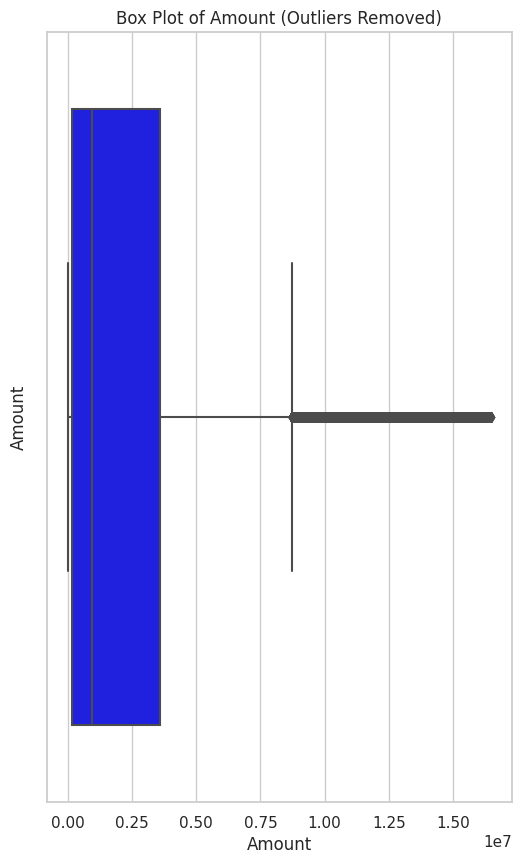

Outliers in Previous Closing:
53        1950.0
72        1830.0
156       1824.0
178       3280.0
182       2120.0
           ...  
164668    2575.0
164677    2110.0
164688    3396.0
164705    2186.0
164720    1975.0
Name: Previous Closing, Length: 12291, dtype: float64


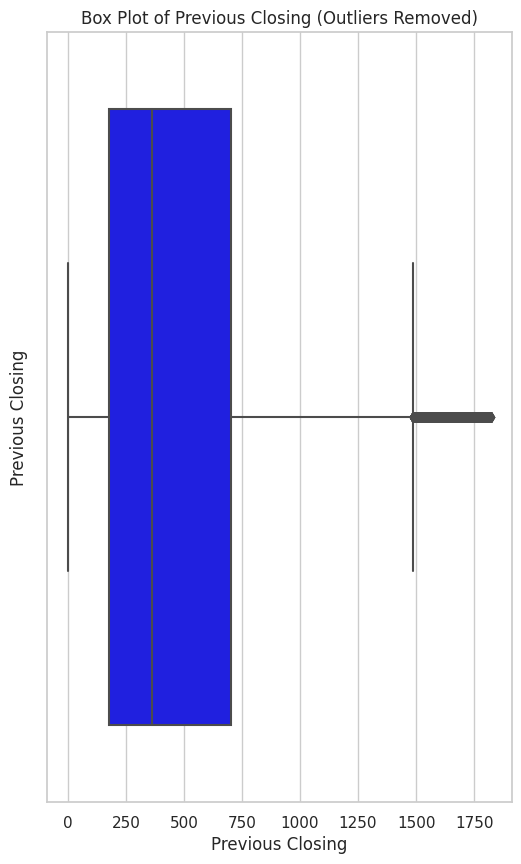

Outliers in Difference Rs.:
53         50.0
97         35.0
104       -21.0
135        25.0
149        32.0
          ...  
164700    100.0
164705     87.0
164706     25.0
164709     21.0
164720     25.0
Name: Difference Rs., Length: 28160, dtype: float64


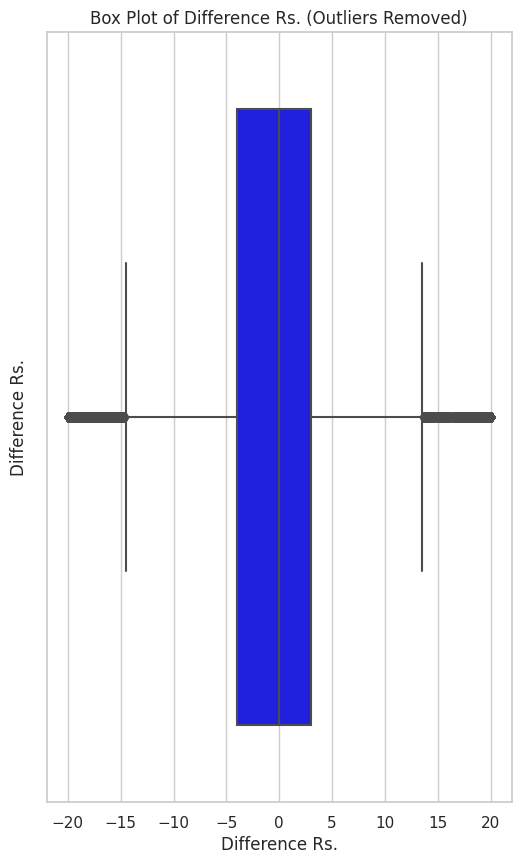

Outliers in SN:
Series([], Name: SN, dtype: float64)


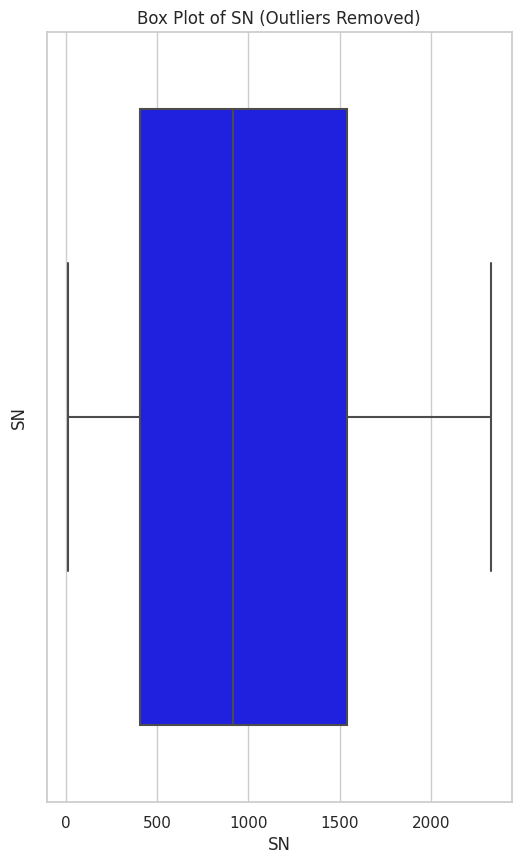

Outliers in change:
1614      39.38
1615      39.38
1616      39.38
1617      39.38
1618      39.38
          ...  
162054    37.95
162055    37.95
162056    37.95
162057    37.95
162058    37.95
Name: change, Length: 21437, dtype: float64


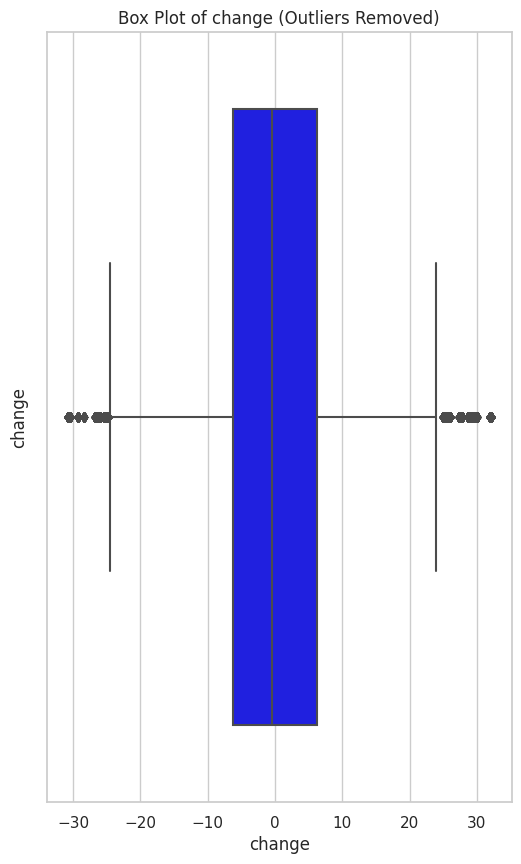

Outliers in pct_change:
1614      4.52
1615      4.52
1616      4.52
1617      4.52
1618      4.52
          ... 
163302    2.78
163303    2.78
163304    2.78
163305    2.78
163306    2.78
Name: pct_change, Length: 9134, dtype: float64


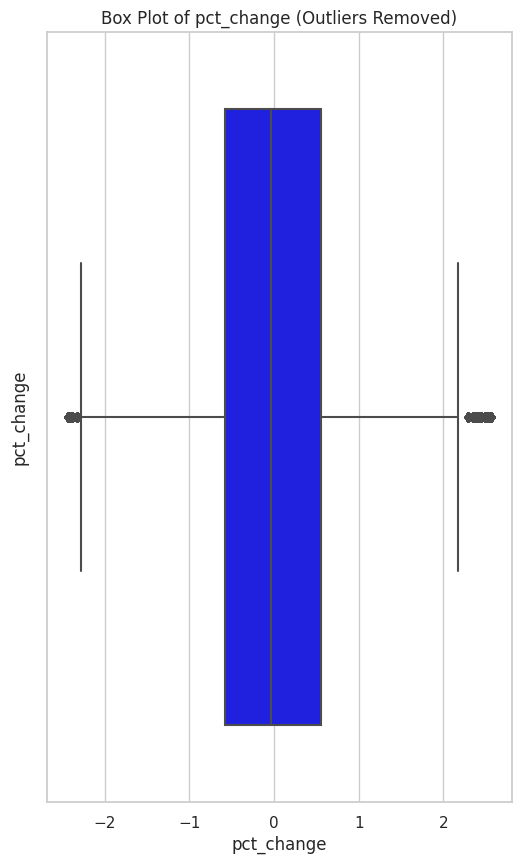

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data (replace 'merged_data.csv' with your actual file path)
merged_df = pd.read_csv('merged_data.csv')

numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and print the outlier values
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f'Outliers in {column_name}:\n{outliers[column_name]}')

    # Remove outliers and return the cleaned DataFrame
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Create vertical box plots for each numerical column and remove outliers
for column_name in numerical_columns:
    # Remove outliers and print their values
    cleaned_df = remove_outliers_iqr(merged_df, column_name)

    # Create a vertical box plot without outliers
    plt.figure(figsize=(6, 10))  # Adjust the figure size for a vertical box plot
    sns.boxplot(data=cleaned_df, x=column_name, color='blue')  # Use 'x' to create a vertical box plot
    plt.ylabel(column_name)  # Set the label for the y-axis
    plt.title(f'Box Plot of {column_name} (Outliers Removed)')
    plt.show()


In [ ]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
stock_prices_df = pd.read_csv('drive/MyDrive/DataScience/Stock/company_stock.csv')
nepse_data_df = pd.read_csv('drive/MyDrive/DataScience/Stock/nepse_index_history.csv')

# Rename the 'Date' column in stock_prices_df to 'date'
stock_prices_df = stock_prices_df.rename(columns={'Date': 'date'})

# Merge the DataFrames based on the 'date' column, using a left join to keep all Nepse data
merged_df = pd.merge(stock_prices_df, nepse_data_df, on='date', how='left')

# Save the merged DataFrame to a new CSV file
merged_csv_file = "drive/MyDrive/DataScience/Stock/merge.csv"
merged_df.to_csv(merged_csv_file, index=False)

print(f'Merged data saved to {merged_csv_file}')


Merged data saved to drive/MyDrive/DataScience/Stock/merge.csv


In [34]:
import pandas as pd
import numpy as np
from scipy import stats

# Load data from a CSV file
merged_csv_file = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(merged_csv_file)

# Remove rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate Z-scores for numeric columns only
z_scores = np.abs(stats.zscore(numeric_columns))

# Define a threshold for outliers (customize as needed)
z_threshold = 2

# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

# Calculate median values for each numeric column
median_values = numeric_columns.median()

# Create a cleaned DataFrame by replacing outliers with median values
df_cleaned = df.copy()
df_cleaned.loc[outlier_mask, numeric_columns.columns] = median_values

# Calculate the number of outliers removed
outliers_removed = len(df) - len(df_cleaned)

# Display the cleaned data
print("Cleaned Data:")
print(df_cleaned)


Cleaned Data:
         S.N.                             Traded Companies  \
0         1.0                    Ace Development Bank Ltd.   
1         2.0        Agricultural Development Bank Limited   
2         3.0  Arun Valley Hydropower Development Co. Ltd.   
3         4.0                       Bank of Kathmandu Ltd.   
4         5.0                Biratlaxmi Bikas Bank Limited   
...       ...                                          ...   
160130  103.0             Tourism Development Bank Limited   
160131  104.0                   Triveni Bikas Bank Limited   
160132  105.0                          Unique Finance Ltd.   
160133  106.0            United Insurance Co. (Nepal) Ltd.   
160134  107.0             Western Development Bank Limited   

        No. Of Transaction  Max Price  Min Price  Closing Price  \
0                      4.0      118.0      115.0          116.0   
1                     68.0      245.0      235.0          242.0   
2                     13.0      290.0   

In [ ]:

import pandas as pd
import os

# Define the directory containing CSV files
csv_directory = "drive/MyDrive/DataScience/Stock/By_Date/By_Date"

csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

data_frames = []

for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    date = csv_file[:-4]
    df = pd.read_csv(file_path)
    df['Date'] = date
    data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)

# Data Cleaning
# Example: Remove rows with missing values
merged_df.dropna(inplace=True)

# Data Preprocessing (if needed)
# Example: Convert date columns to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Save the cleaned and preprocessed data
merged_csv_file = "drive/MyDrive/DataScience/Stock/company_stock_cleaned.csv"
merged_df.to_csv(merged_csv_file, index=False)

print(f'Cleaned and merged data saved to {merged_csv_file}')


Cleaned and merged data saved to drive/MyDrive/DataScience/Stock/company_stock_cleaned.csv


<ipython-input-10-3f552127a50b>:7: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


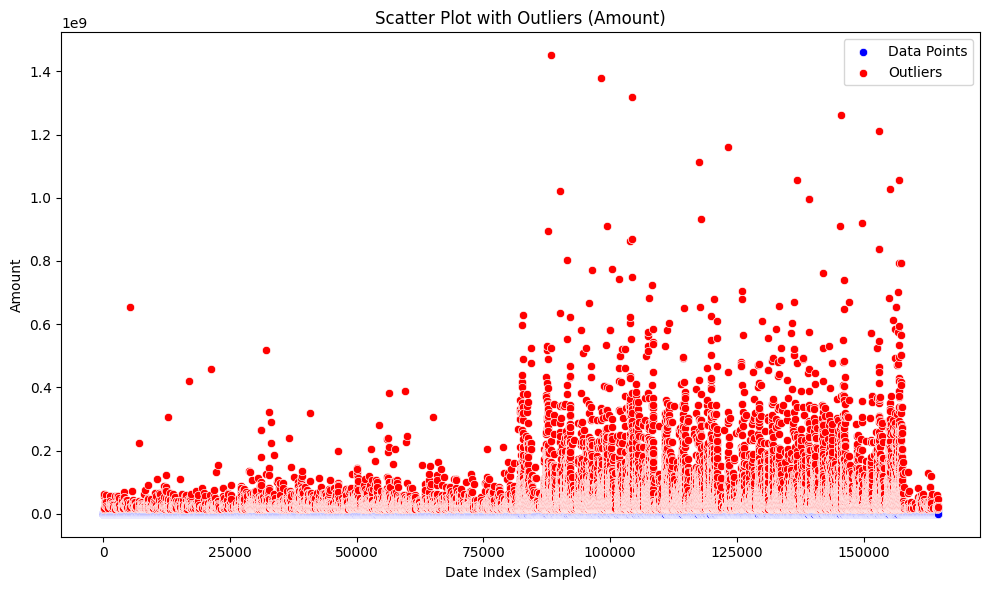

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data
merged_df = pd.read_csv('merged_data.csv')

# Specify the column and bounds for outlier detection
column_name = 'Amount'
Q1 = merged_df[column_name].quantile(0.25)
Q3 = merged_df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df[(merged_df[column_name] < lower_bound) | (merged_df[column_name] > upper_bound)]


sampled_indices = np.arange(0, merged_df.shape[0], step=10)  # Adjust the step value as needed

# Plot a scatter plot with sampled dates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df.iloc[sampled_indices], x=sampled_indices, y=column_name, color='blue', label='Data Points')
sns.scatterplot(data=outliers, x=outliers.index, y=column_name, color='red', label='Outliers')
plt.xlabel('Date Index (Sampled)')
plt.ylabel(column_name)
plt.title(f'Scatter Plot with Outliers ({column_name})')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-22-993c51429529>:6: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


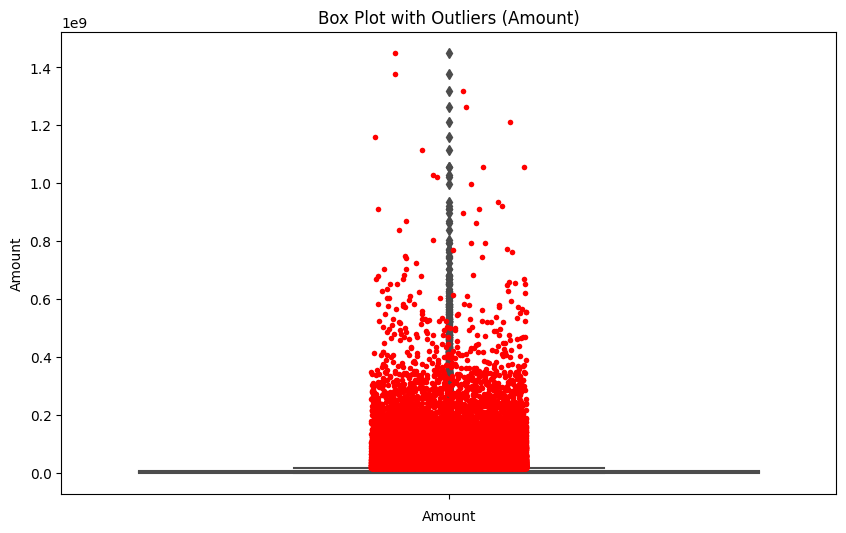

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data
merged_df = pd.read_csv('merged_data.csv')

# Specify the column and bounds for outlier detection
column_name = 'Amount'
Q1 = merged_df[column_name].quantile(0.25)
Q3 = merged_df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_df[(merged_df[column_name] < lower_bound) | (merged_df[column_name] > upper_bound)]

# Create a box plot that highlights the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, y=column_name, color='blue')
sns.stripplot(data=outliers, y=column_name, color='red', size=4, jitter=True)
plt.xlabel(column_name)
plt.title(f'Box Plot with Outliers ({column_name})')
plt.show()


<ipython-input-23-c1cf7d9b4b12>:6: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


<Figure size 1200x800 with 0 Axes>

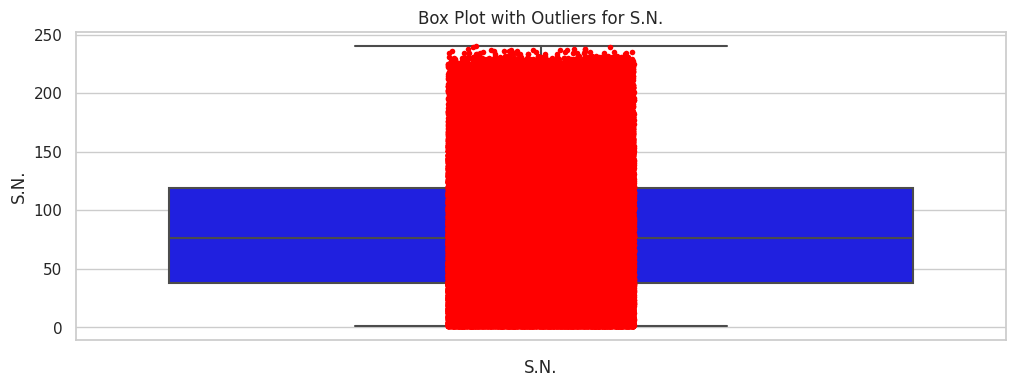

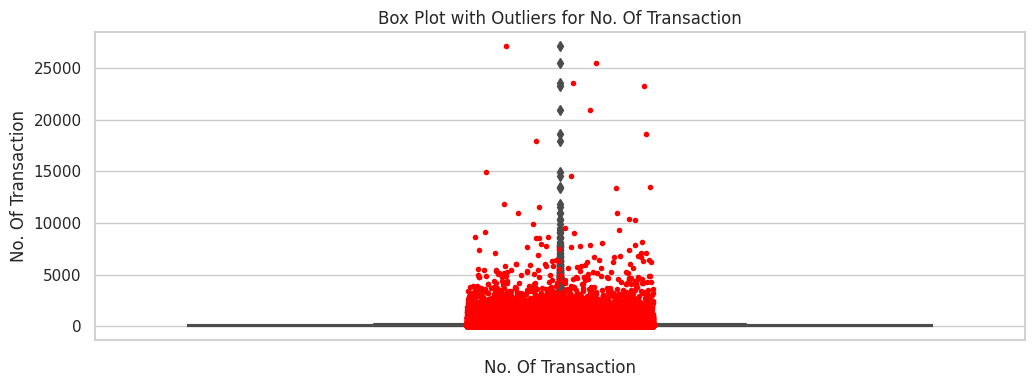

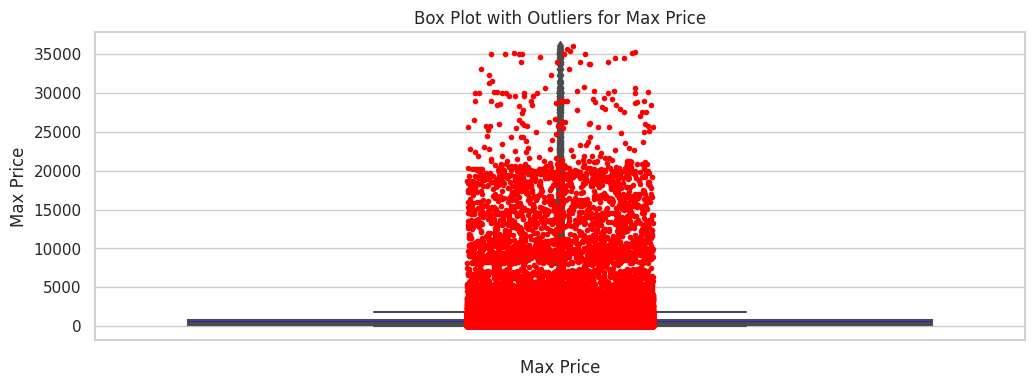

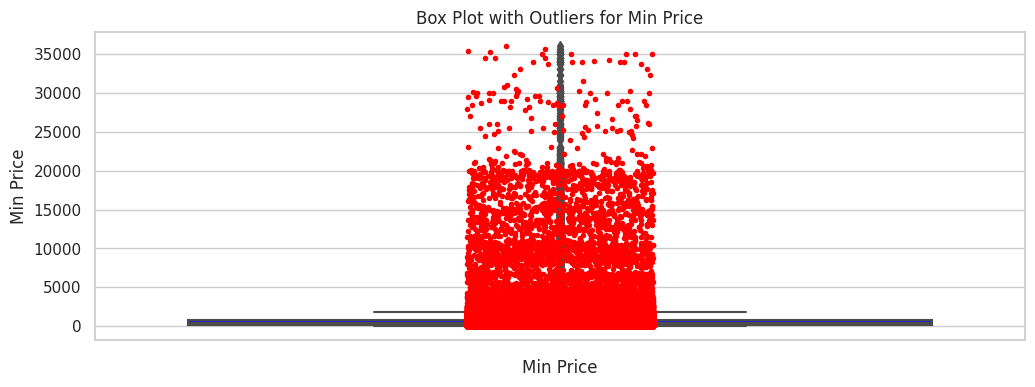

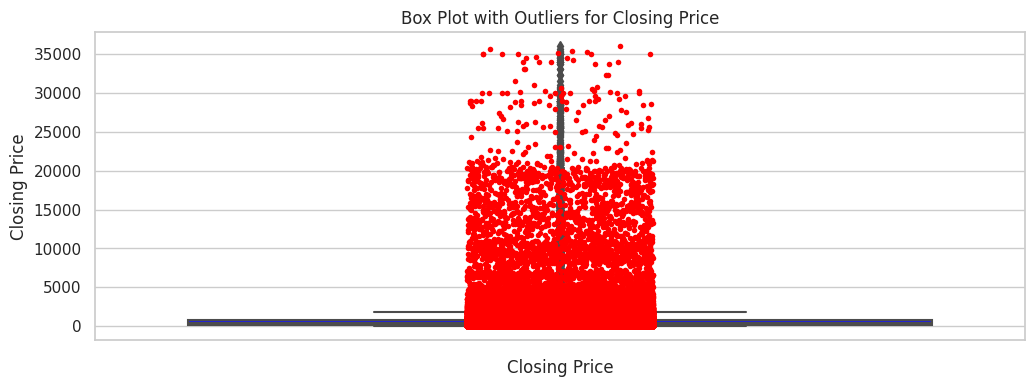

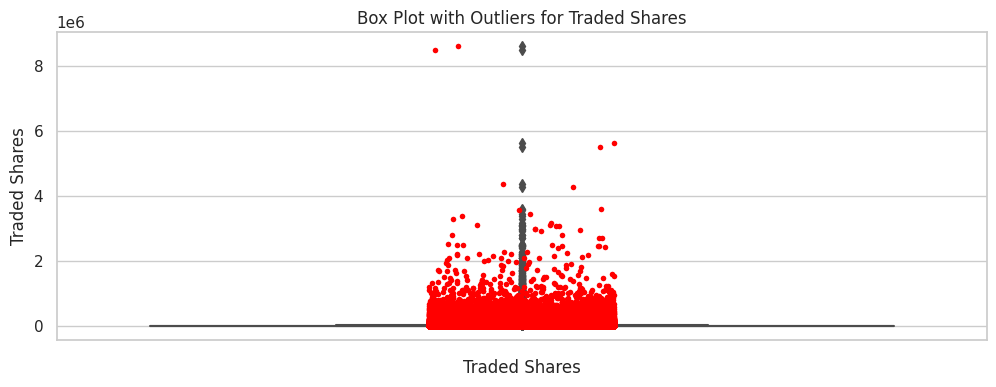

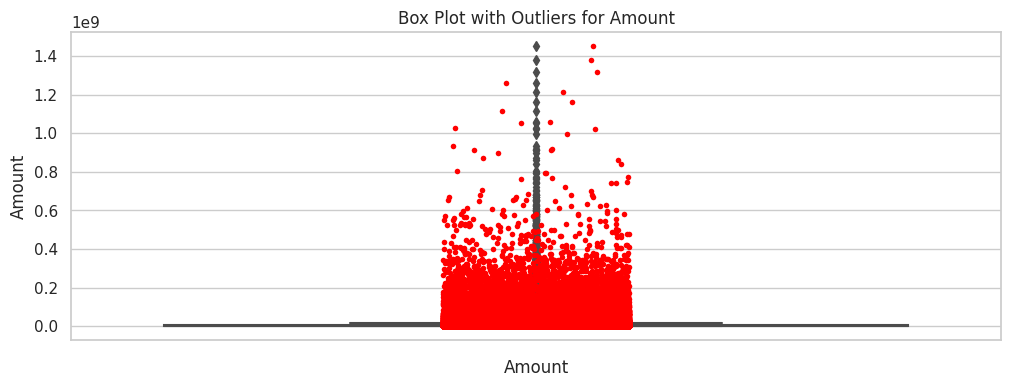

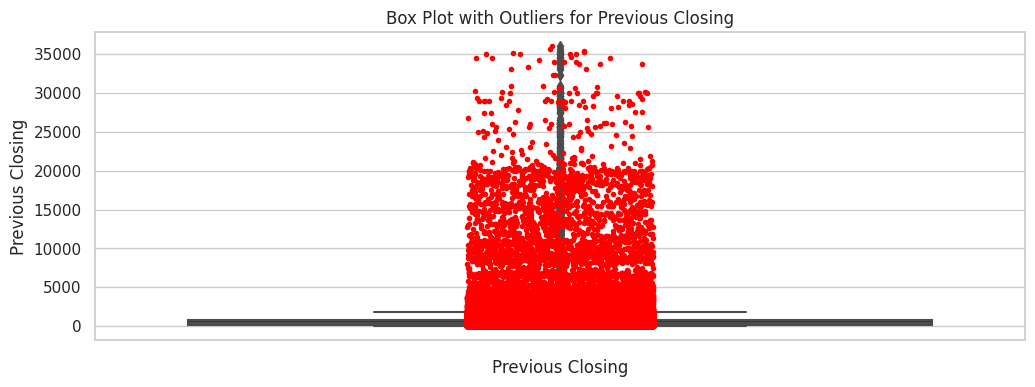

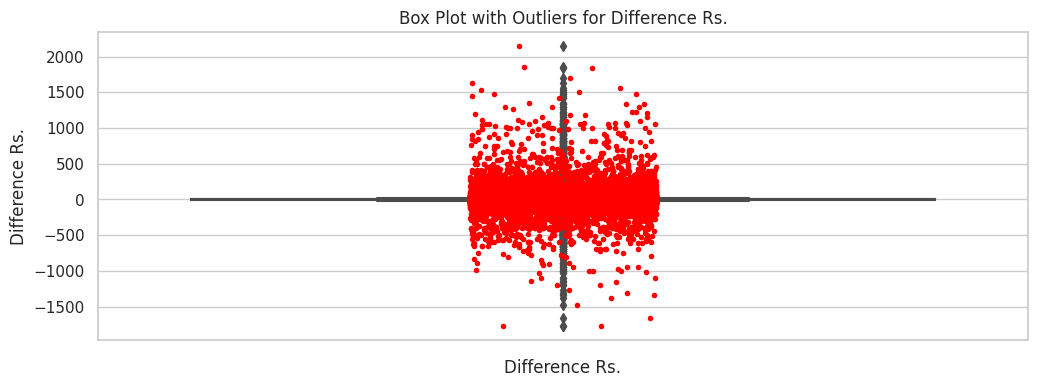

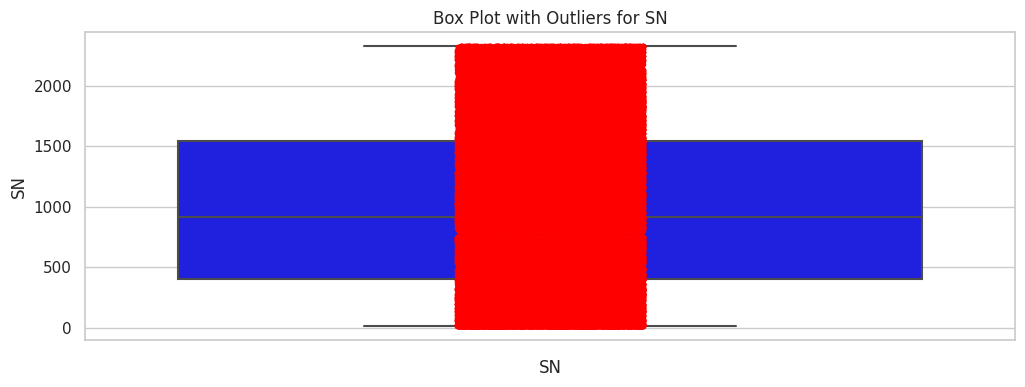

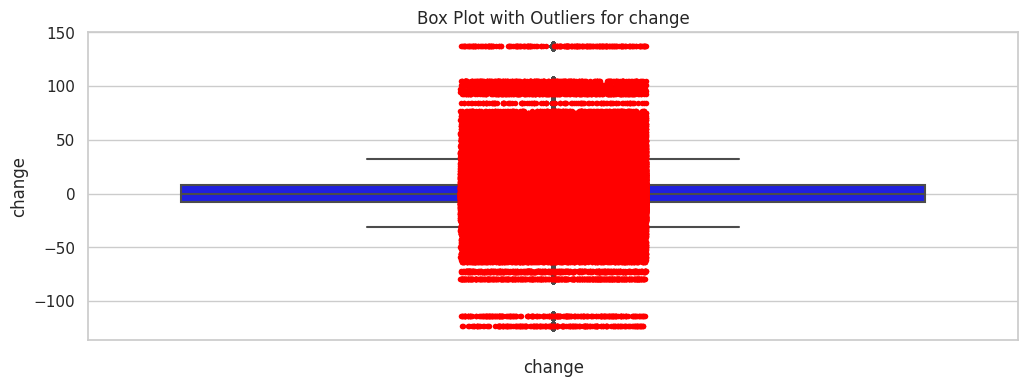

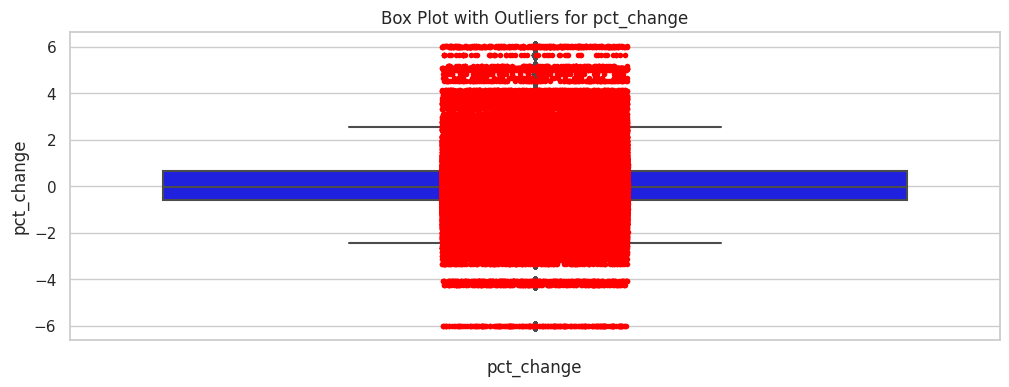

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.read_csv('merged_data.csv')

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")


for column_name in merged_df.columns:
    if merged_df[column_name].dtype in ['int64', 'float64']:
        plt.figure(figsize=(12, 4))
        sns.boxplot(data=merged_df, y=column_name, color='blue')
        sns.stripplot(data=merged_df, y=column_name, color='red', size=4, jitter=True)
        plt.xlabel(column_name)
        plt.title(f'Box Plot with Outliers for {column_name}')
        plt.show()

plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data (replace 'merged_data.csv' with your actual file path)
merged_df = pd.read_csv('merged_data.csv')

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List to store cleaned DataFrames
cleaned_dfs = []

# Filter out non-numeric columns
numerical_columns = merged_df.select_dtypes(include=np.number).columns

# Exclude the "Traded Companies" column if it's present
if "Traded Companies" in numerical_columns:
    numerical_columns = numerical_columns.drop(Traded Companies)

# Create horizontal box plots for each numerical column and remove outliers
for column_name in numerical_columns:
    # Remove outliers for the current column
    cleaned_df = remove_outliers_iqr(merged_df, column_name)
    cleaned_dfs.append(cleaned_df)

# Create a horizontal box plot for all numerical columns (except "Traded Companies")
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_dfs, orient="h", palette="Set3")  # "orient" is set to "h" for horizontal format
plt.title('Horizontal Box Plots of Numerical Columns (Outliers Removed)')
plt.show()


SyntaxError: ignored

<ipython-input-14-98f715cdf5be>:6: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


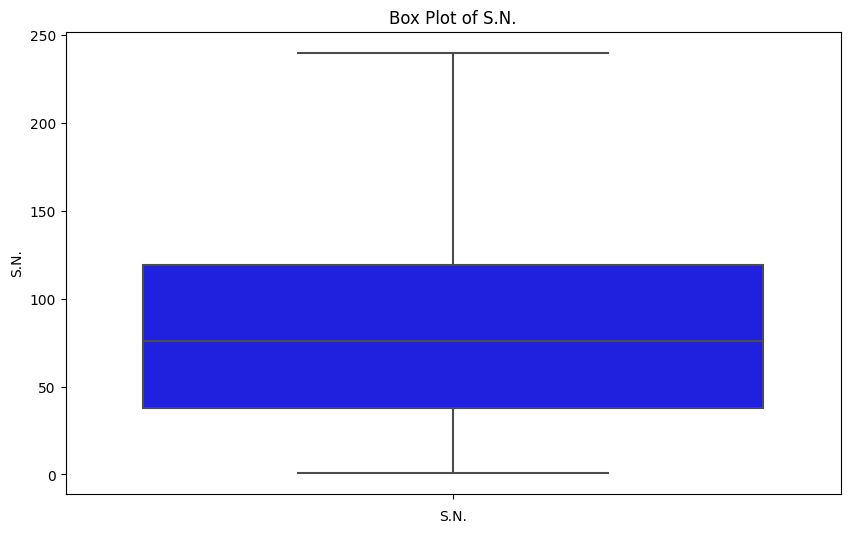

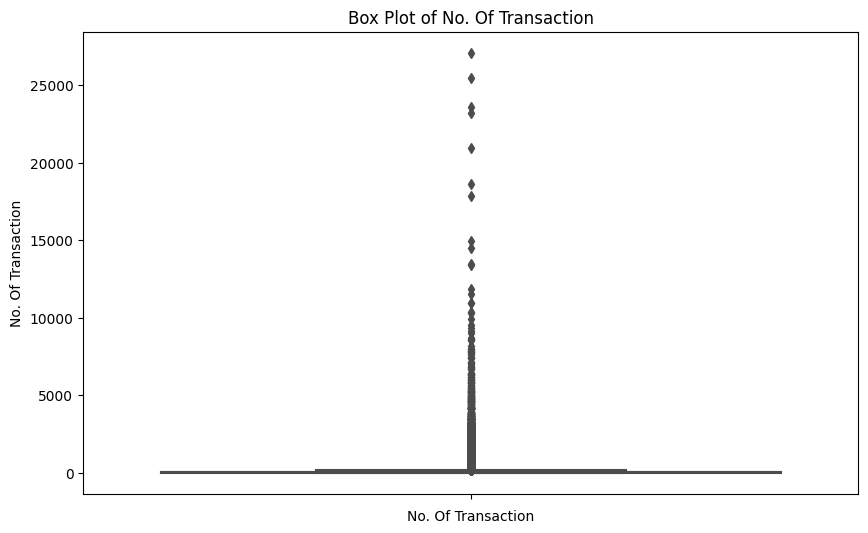

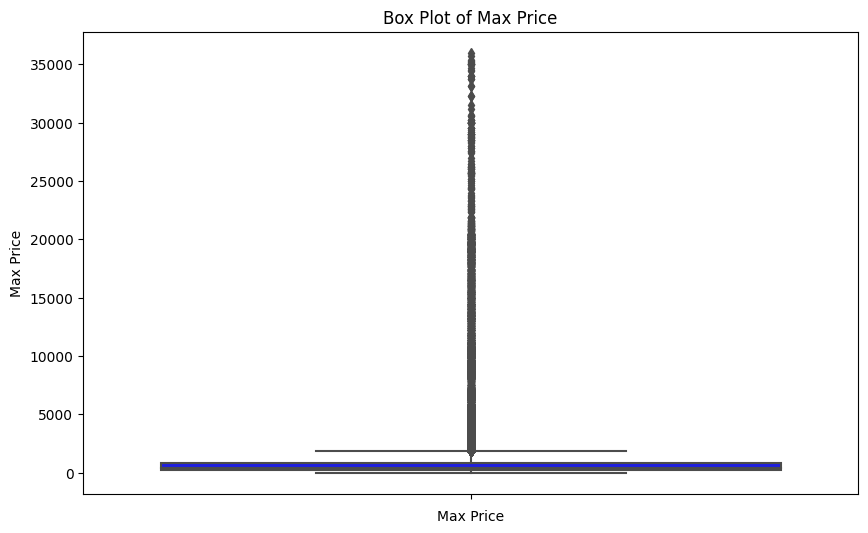

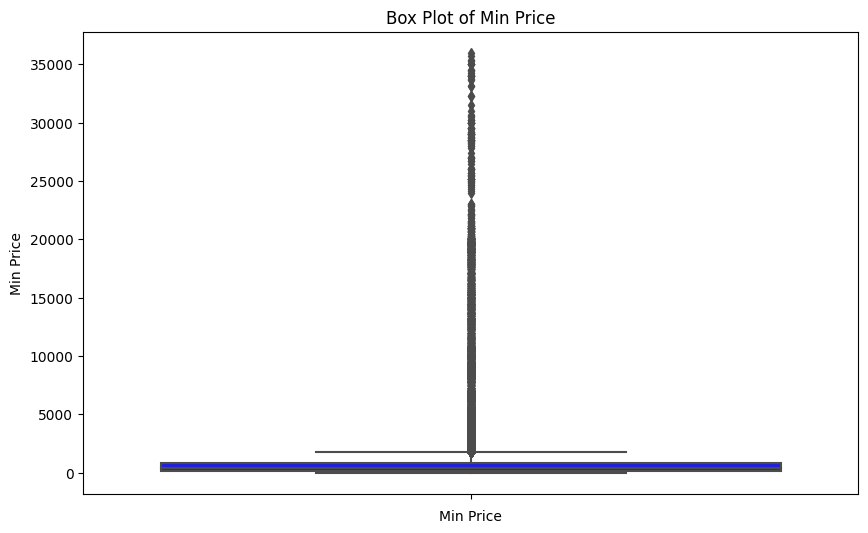

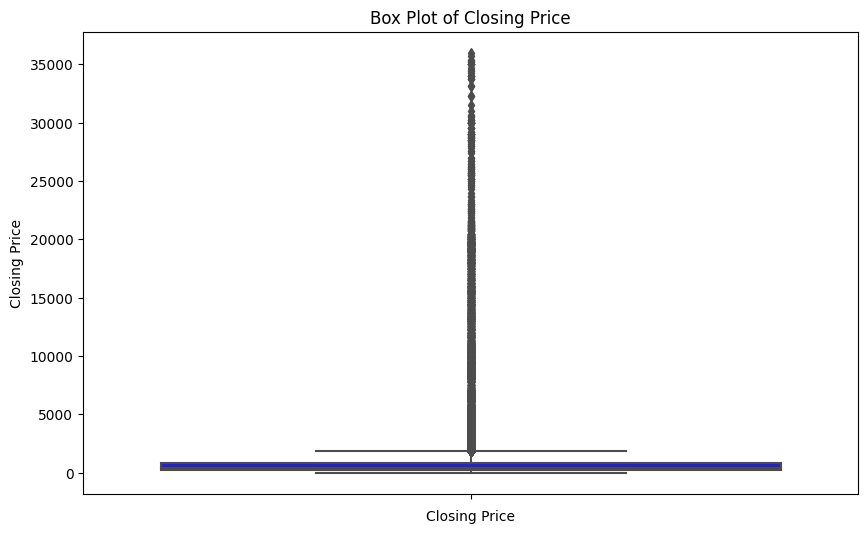

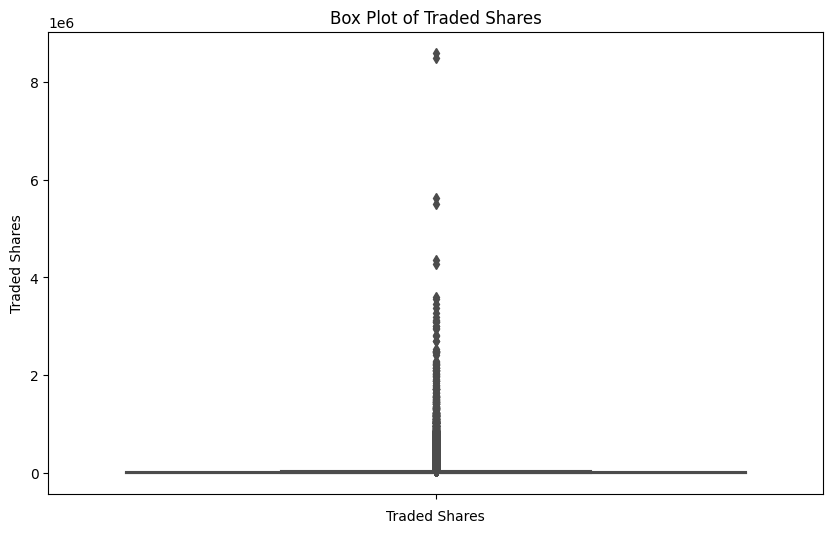

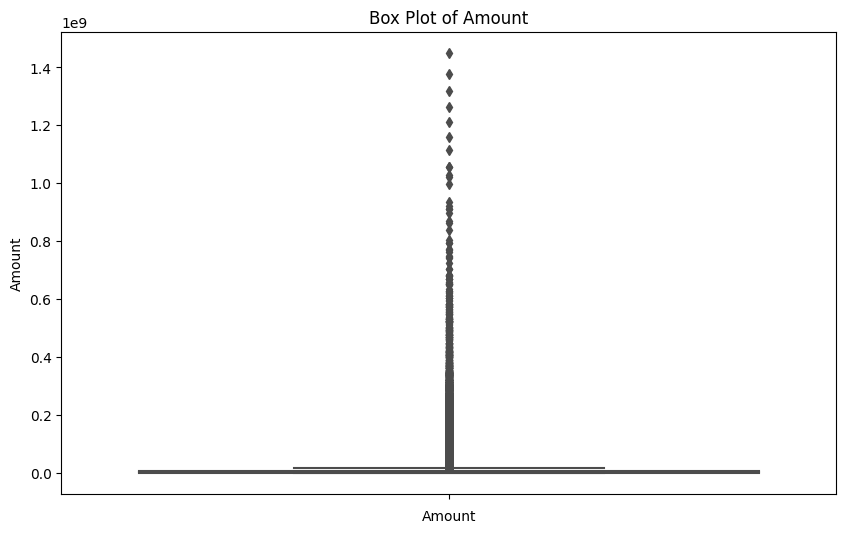

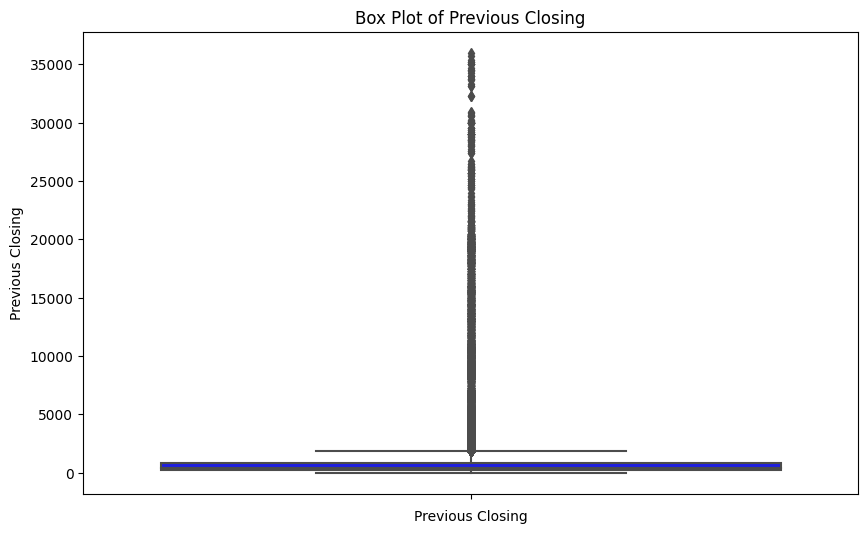

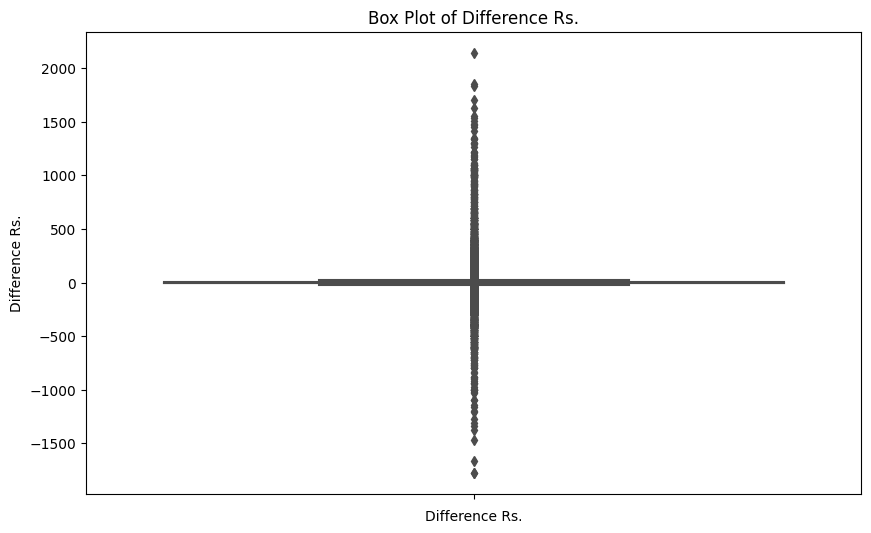

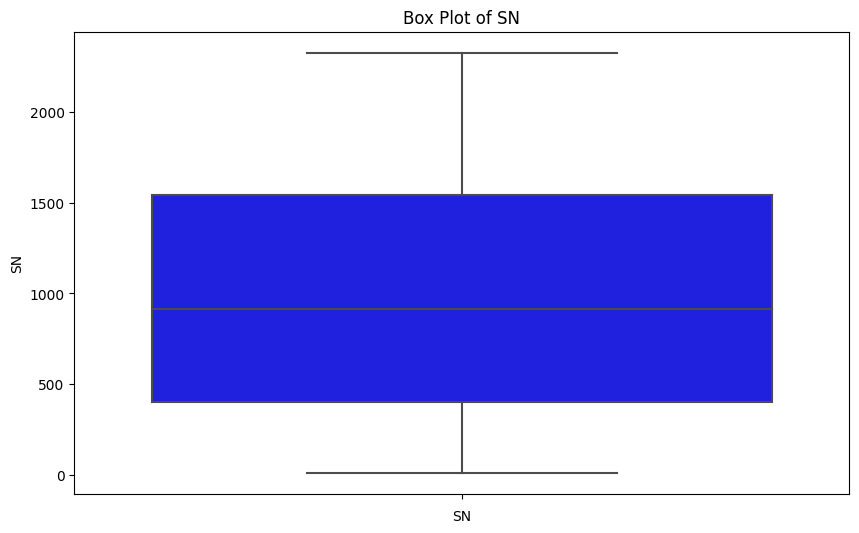

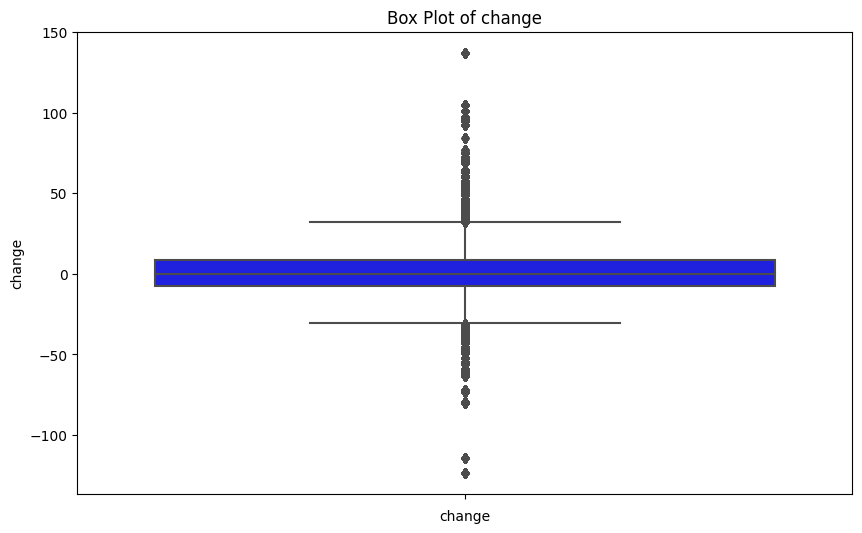

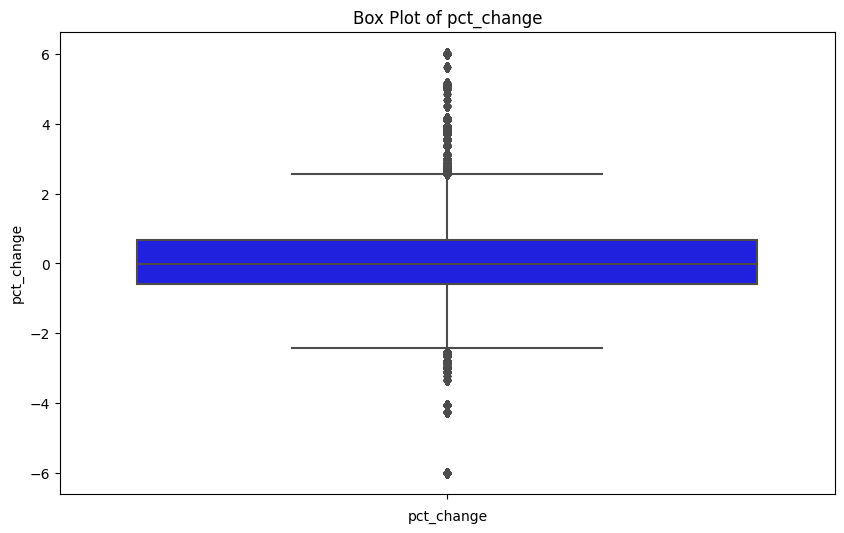

In [ ]:

# Load the merged data
merged_df = pd.read_csv('merged_data.csv')


numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
for column_name in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df, y=column_name, color='blue')
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()


<ipython-input-31-3a48eaf341ac>:7: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


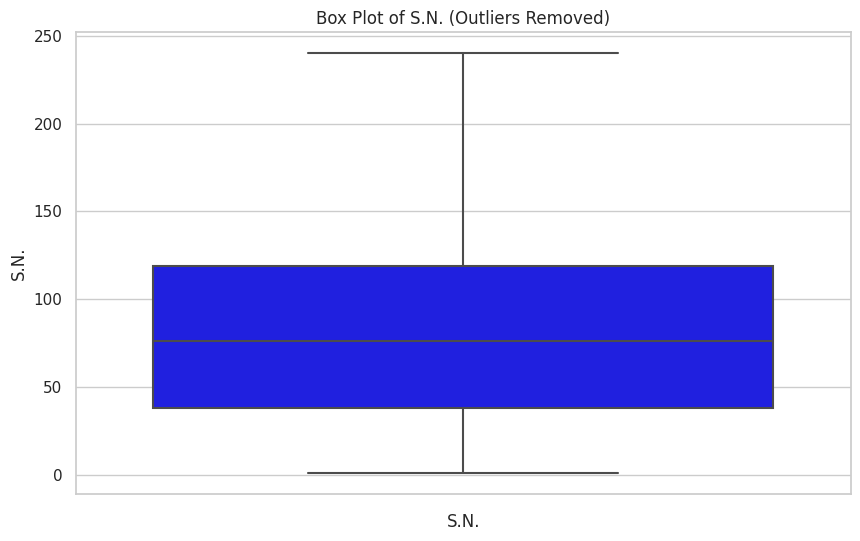

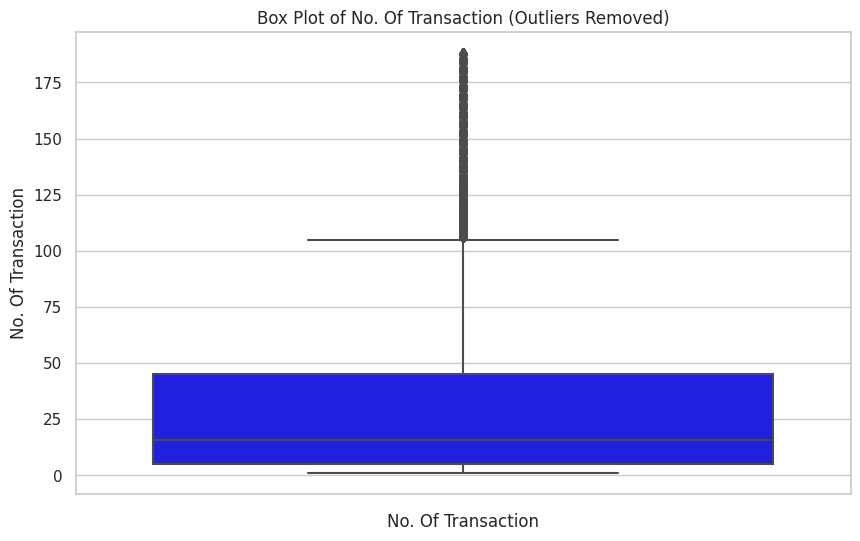

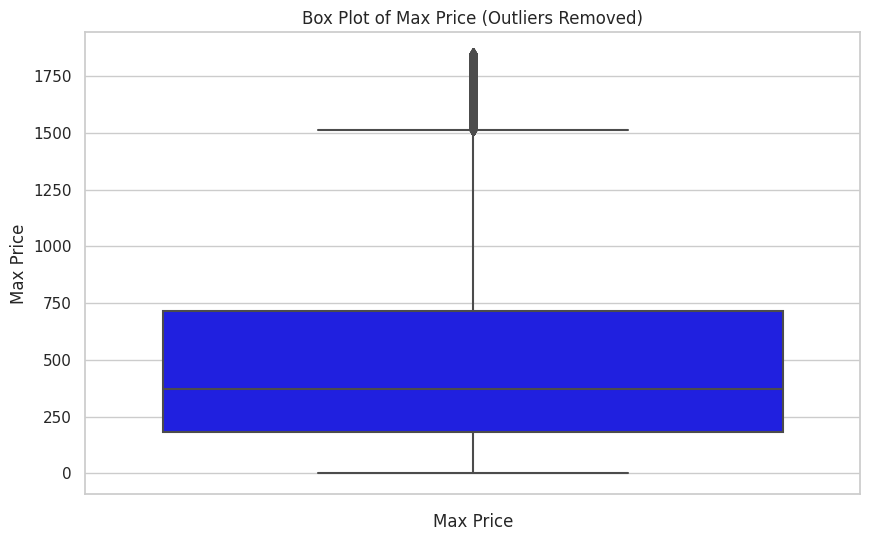

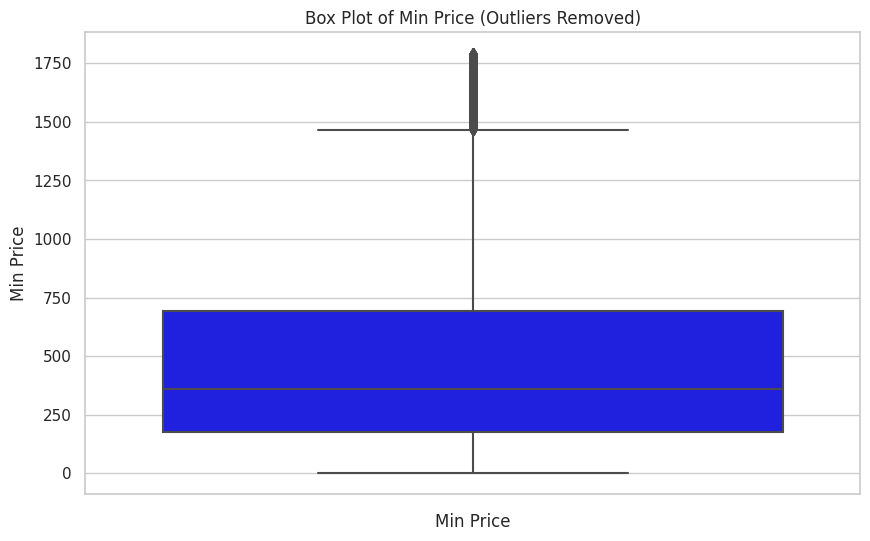

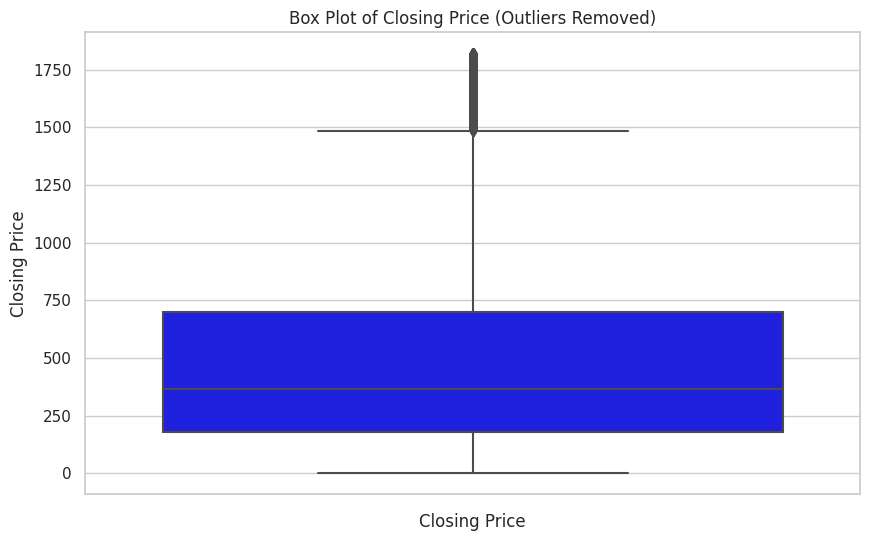

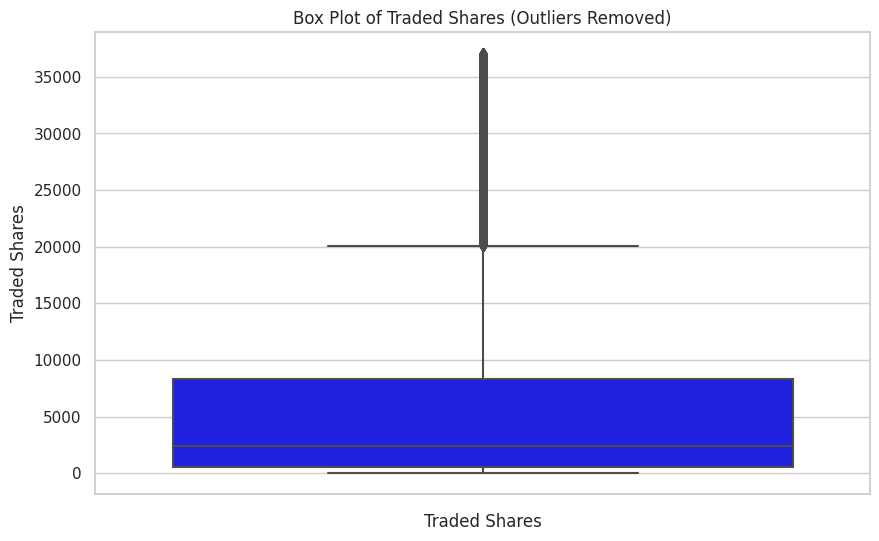

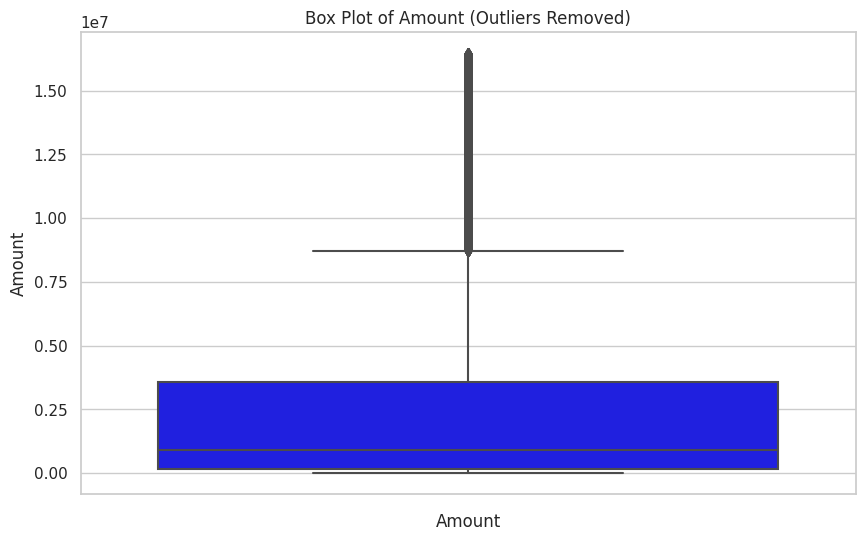

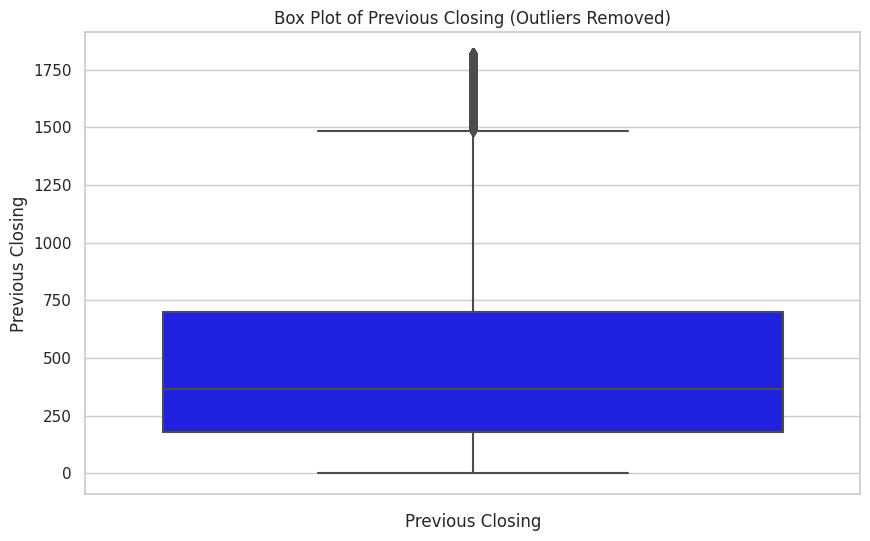

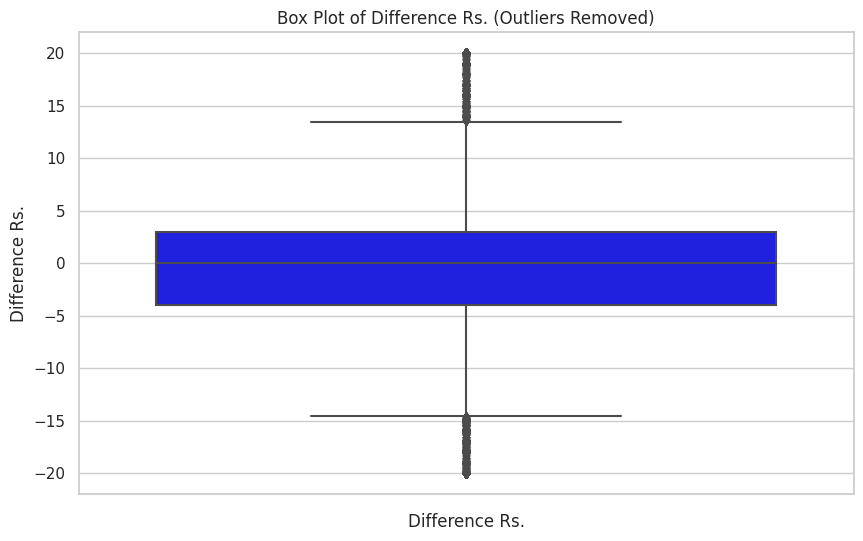

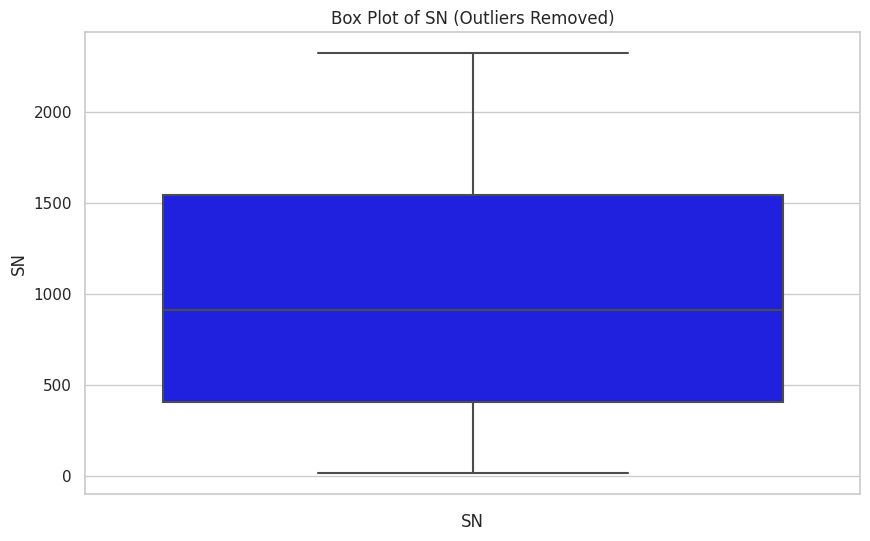

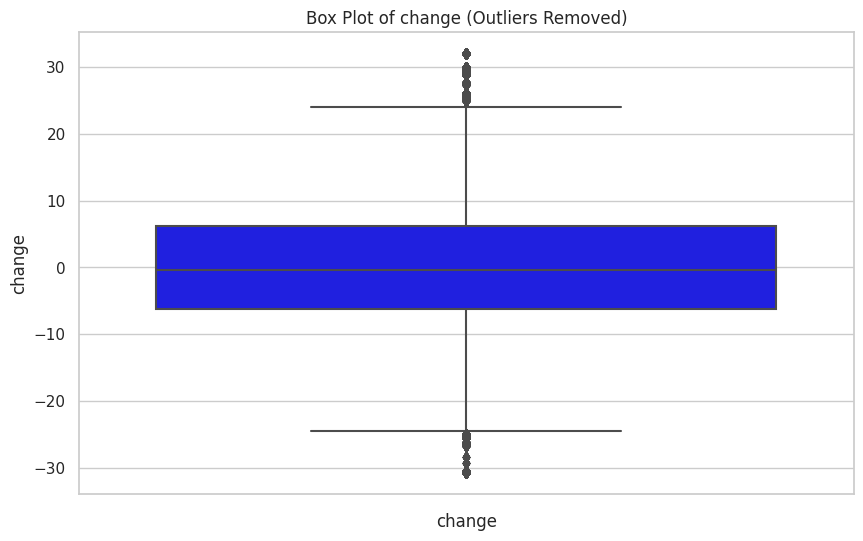

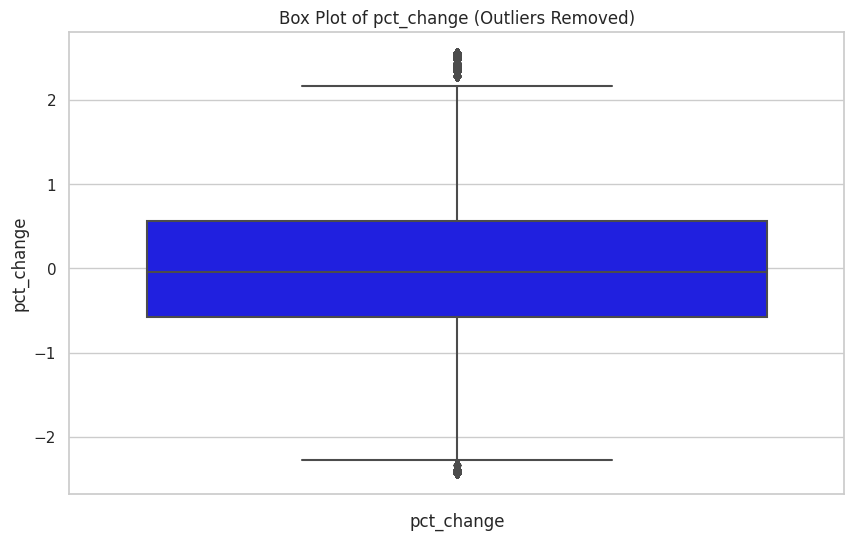

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data (replace 'merged_data.csv' with your actual file path)
merged_df = pd.read_csv('merged_data.csv')

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List to store cleaned DataFrames
cleaned_dfs = []

# Create box plots for each numerical column and remove outliers
for column_name in numerical_columns:
    # Remove outliers for the current column
    cleaned_df = remove_outliers_iqr(merged_df, column_name)
    cleaned_dfs.append(cleaned_df)

    # Create a box plot without outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cleaned_df, y=column_name, color='blue')
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name} (Outliers Removed)')
    plt.show()

# To access the cleaned DataFrames, you can use cleaned_dfs list, e.g., cleaned_dfs[0] for the first DataFrame.


<ipython-input-36-c5612dc98124>:7: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


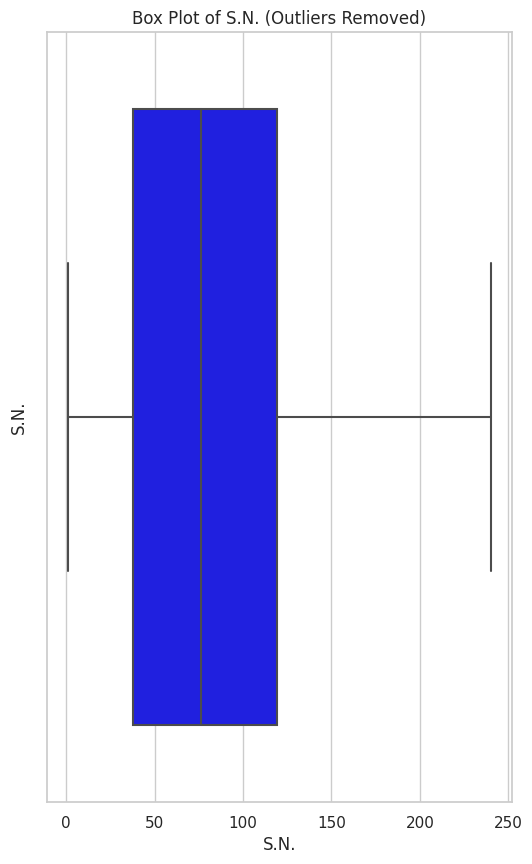

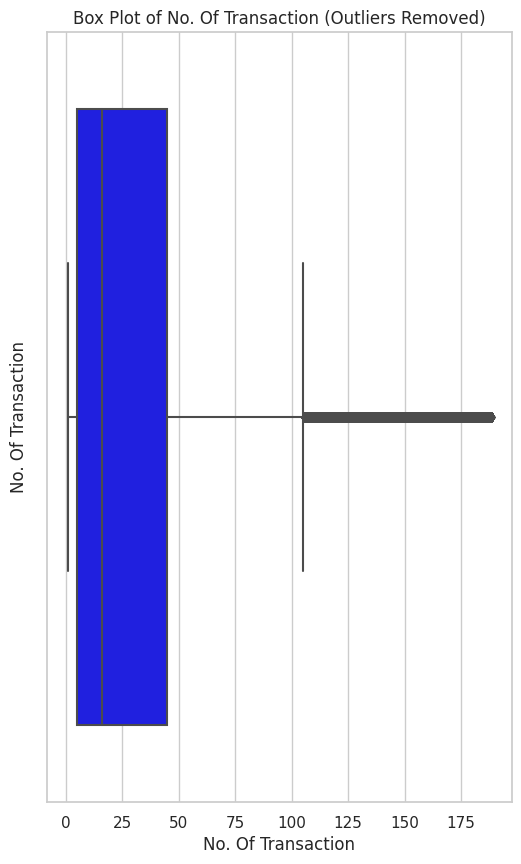

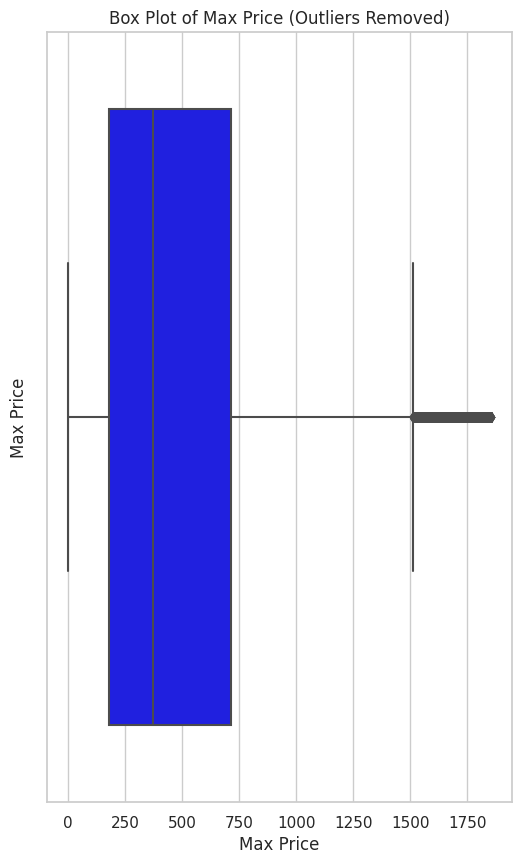

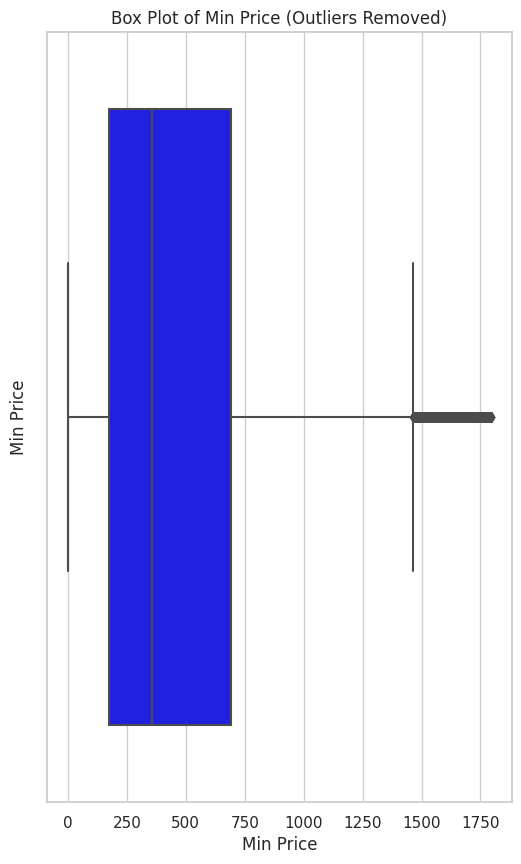

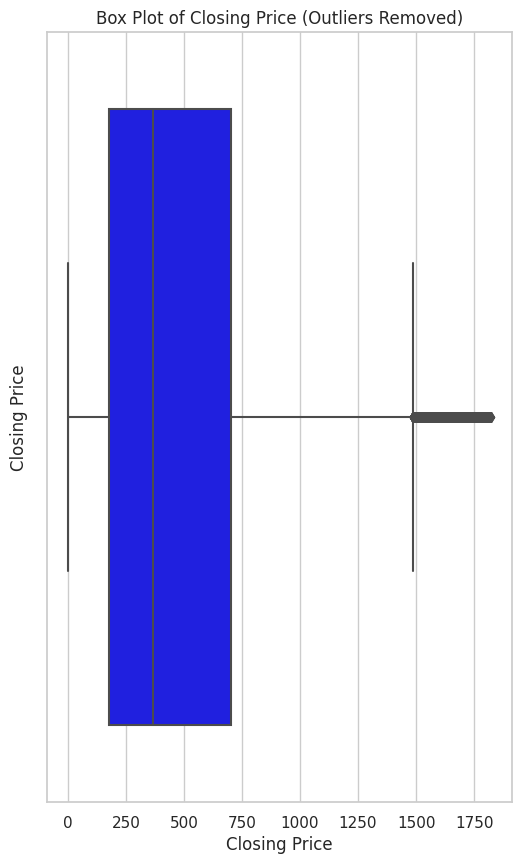

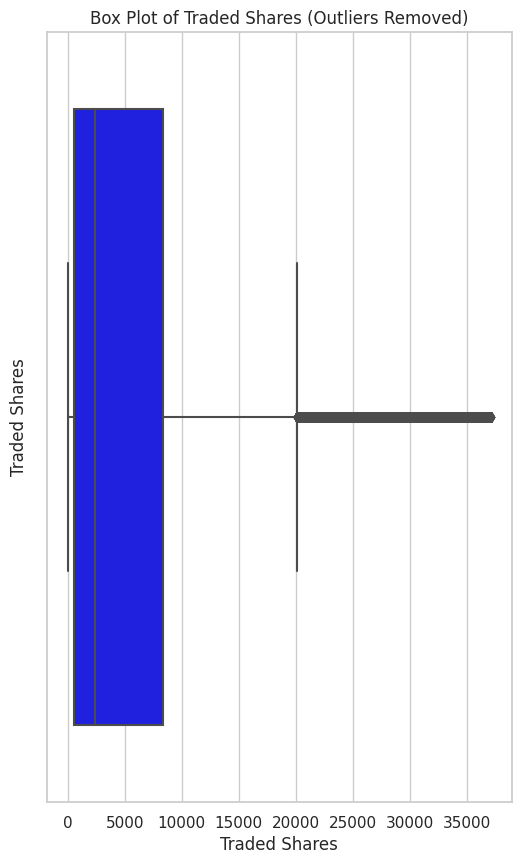

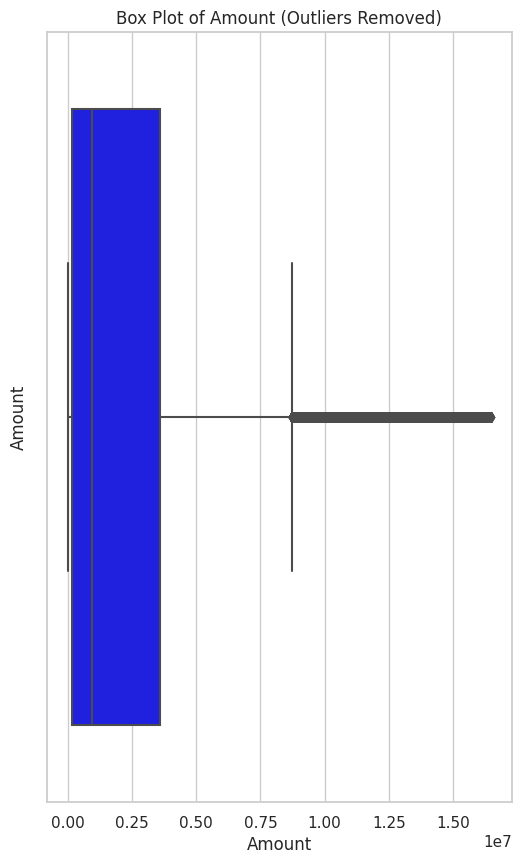

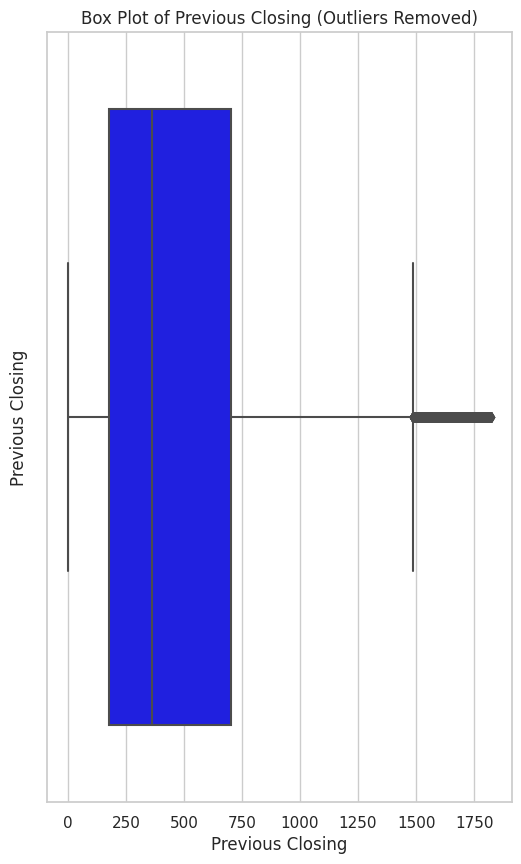

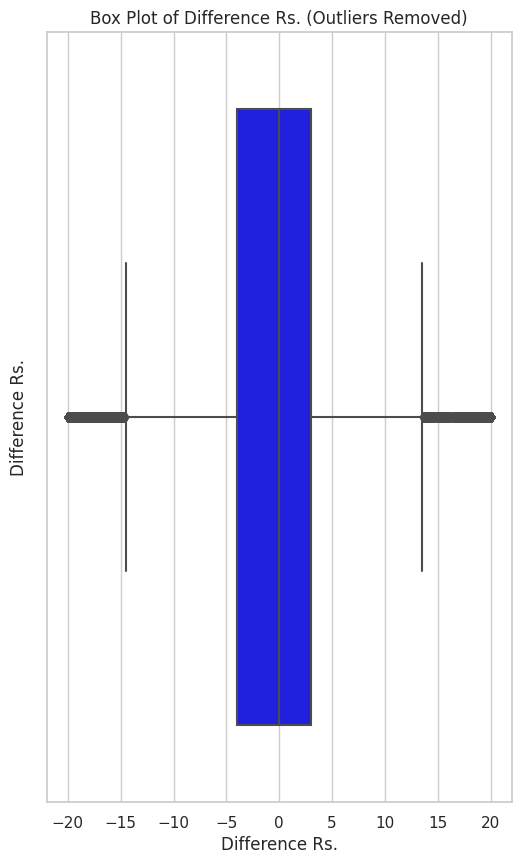

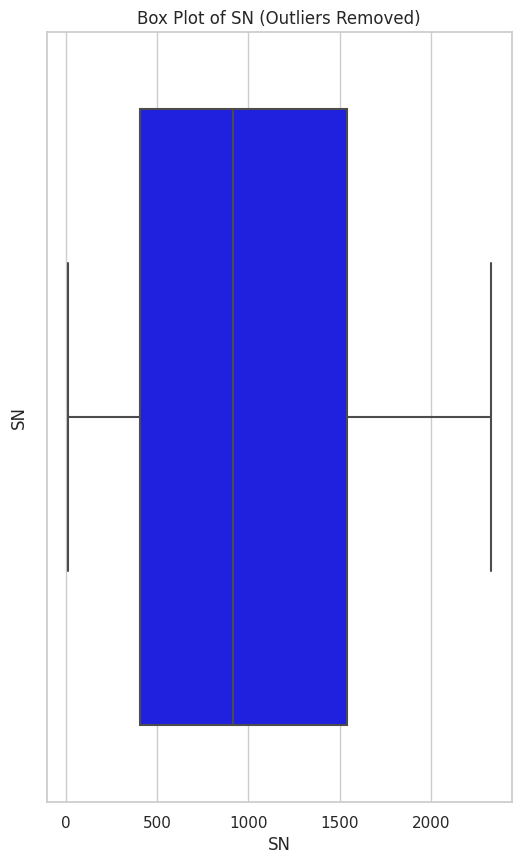

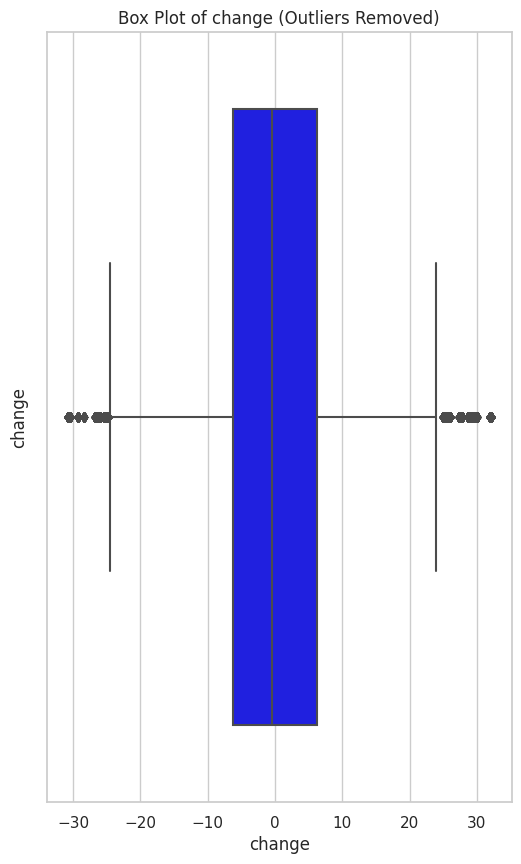

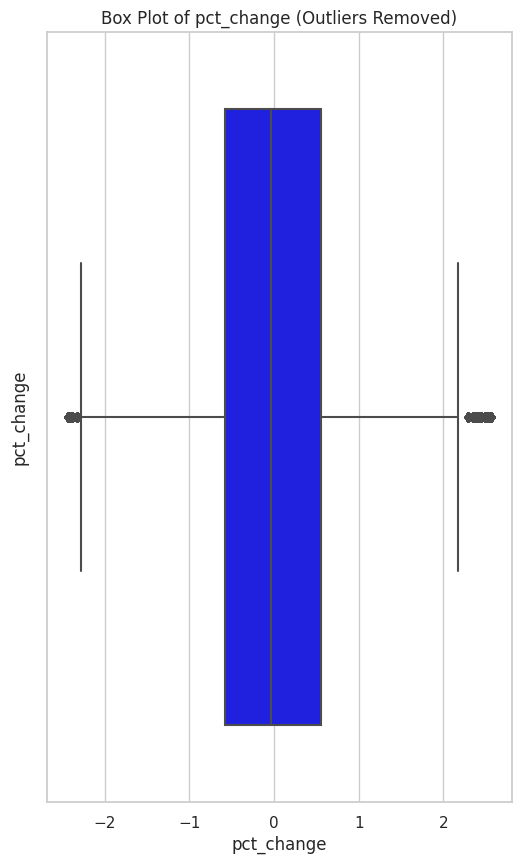

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data (replace 'merged_data.csv' with your actual file path)
merged_df = pd.read_csv('merged_data.csv')

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List to store cleaned DataFrames
cleaned_dfs = []

# Create box plots for each numerical column and remove outliers
for column_name in numerical_columns:
    # Remove outliers for the current column
    cleaned_df = remove_outliers_iqr(merged_df, column_name)
    cleaned_dfs.append(cleaned_df)

    # Create a vertical box plot without outliers
    plt.figure(figsize=(6, 10))  # Adjust the figure size to create a vertical box plot
    sns.boxplot(data=cleaned_df, x=column_name, color='blue')  # Use 'x' to create a vertical box plot
    plt.ylabel(column_name)  # Set the label for the y-axis
    plt.title(f'Box Plot of {column_name} (Outliers Removed)')
    plt.show()

# To access the cleaned DataFrames, you can use cleaned_dfs list, e.g., cleaned_dfs[0] for the first DataFrame.


Cleaned Data:
         S.N.                             Traded Companies  \
0         1.0                    Ace Development Bank Ltd.   
1         2.0        Agricultural Development Bank Limited   
2         3.0  Arun Valley Hydropower Development Co. Ltd.   
3         4.0                       Bank of Kathmandu Ltd.   
4         5.0                Biratlaxmi Bikas Bank Limited   
...       ...                                          ...   
160130  103.0             Tourism Development Bank Limited   
160131  104.0                   Triveni Bikas Bank Limited   
160132  105.0                          Unique Finance Ltd.   
160133  106.0            United Insurance Co. (Nepal) Ltd.   
160134  107.0             Western Development Bank Limited   

        No. Of Transaction  Max Price  Min Price  Closing Price  \
0                      4.0      118.0      115.0          116.0   
1                     68.0      245.0      235.0          242.0   
2                     13.0      290.0   

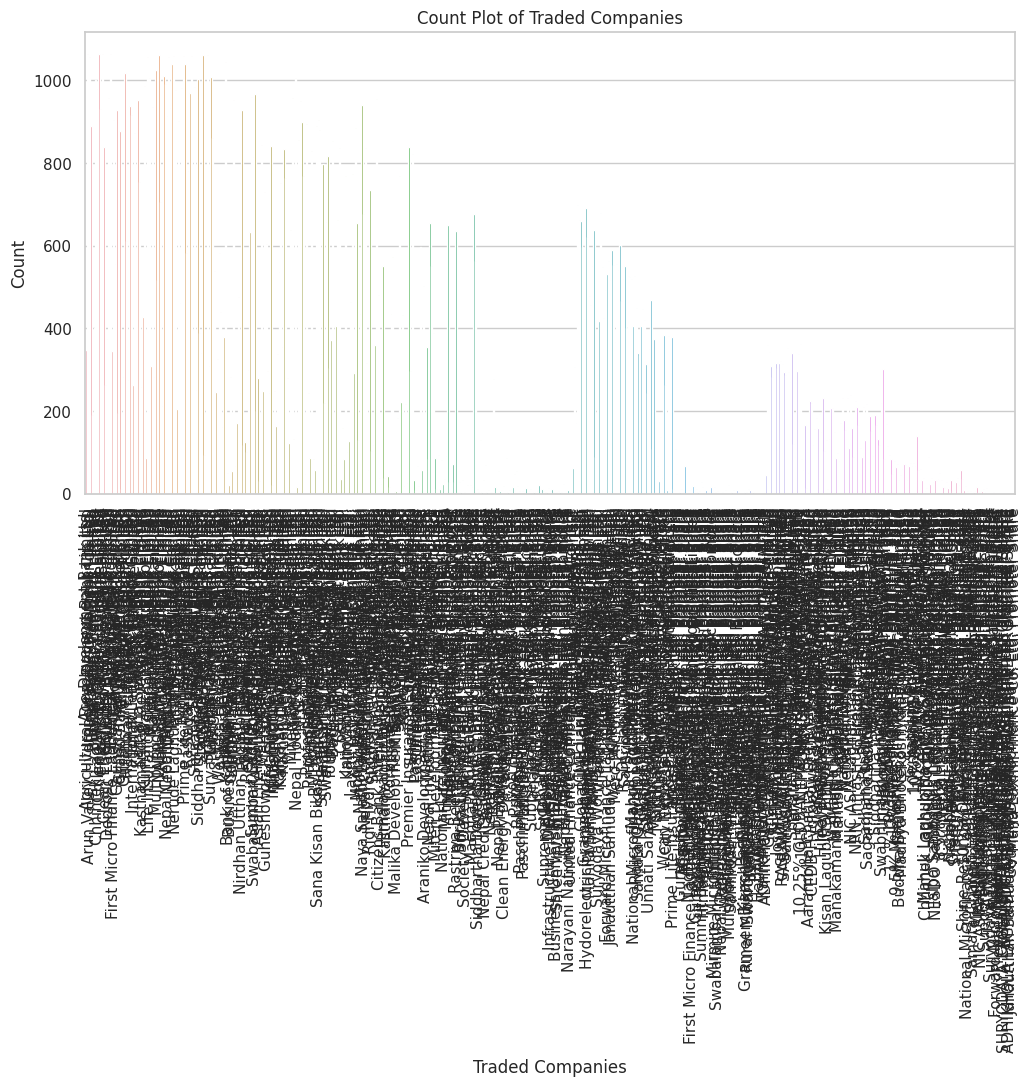

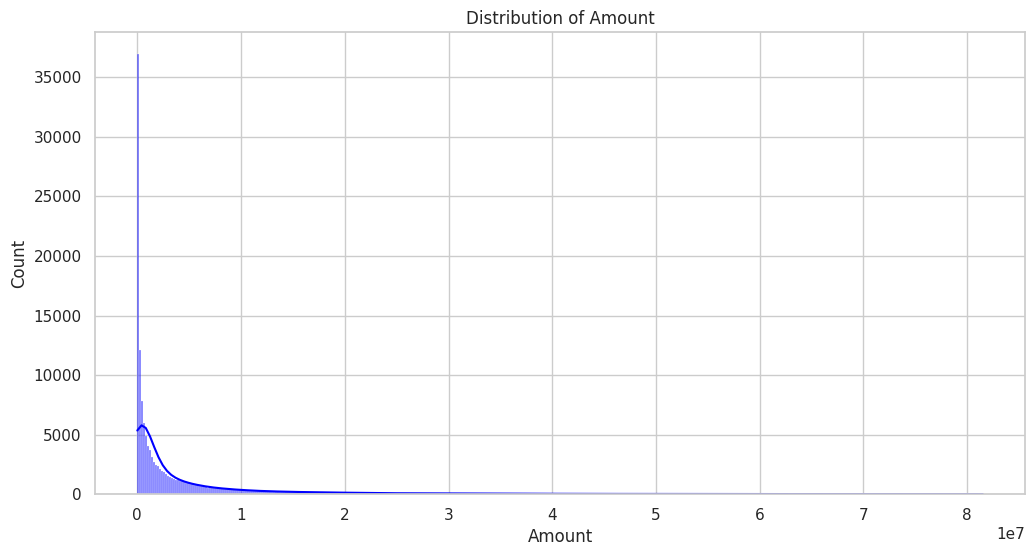

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file
merged_csv_file = "drive/MyDrive/DataScience/Stock/company_stock.csv"
df = pd.read_csv(merged_csv_file)

# Remove rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate Z-scores for numeric columns only
z_scores = np.abs(stats.zscore(numeric_columns))

# Define a threshold for outliers (customize as needed)
z_threshold = 2

# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

# Calculate median values for each numeric column
median_values = numeric_columns.median()

# Create a cleaned DataFrame by replacing outliers with median values
df_cleaned = df.copy()
df_cleaned.loc[outlier_mask, numeric_columns.columns] = median_values

# Calculate the number of outliers removed
outliers_removed = len(df) - len(df_cleaned)

# Display the cleaned data
print("Cleaned Data:")
print(df_cleaned)

# Create a count plot for 'Traded Companies'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Traded Companies')
plt.xticks(rotation=90)
plt.title('Count Plot of Traded Companies')
plt.xlabel('Traded Companies')
plt.ylabel('Count')
plt.show()

# Create a distribution plot for 'Amount'
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='Amount', kde=True, color='blue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


<ipython-input-30-2b913f7ed9d6>:6: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


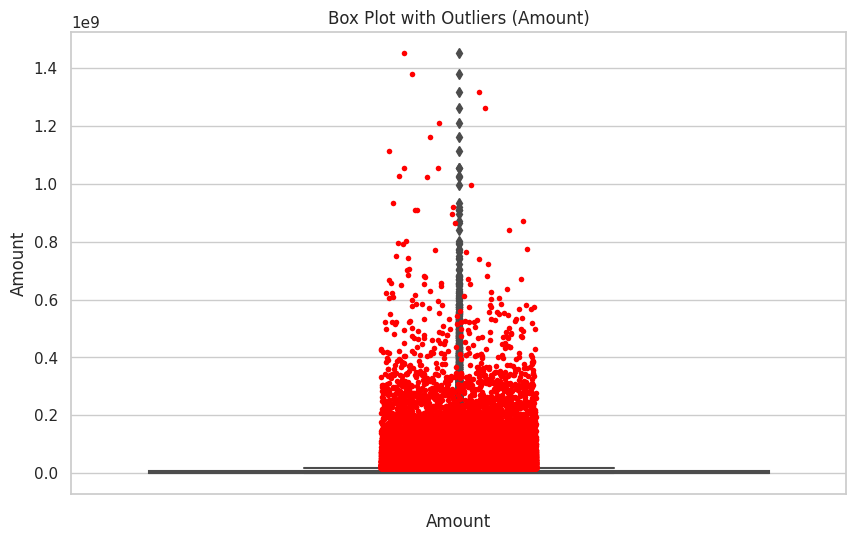

In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data (replace 'merged_data.csv' with your actual file path)
merged_df = pd.read_csv('merged_data.csv')

# Specify the column and bounds for outlier detection
column_name = 'Amount'
Q1 = merged_df[column_name].quantile(0.25)
Q3 = merged_df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_df[(merged_df[column_name] < lower_bound) | (merged_df[column_name] > upper_bound)]

# Create a box plot that highlights the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, y=column_name, color='blue')
sns.stripplot(data=outliers, y=column_name, color='red', size=4, jitter=True)
plt.xlabel(column_name)
plt.title(f'Box Plot with Outliers ({column_name})')
plt.show()


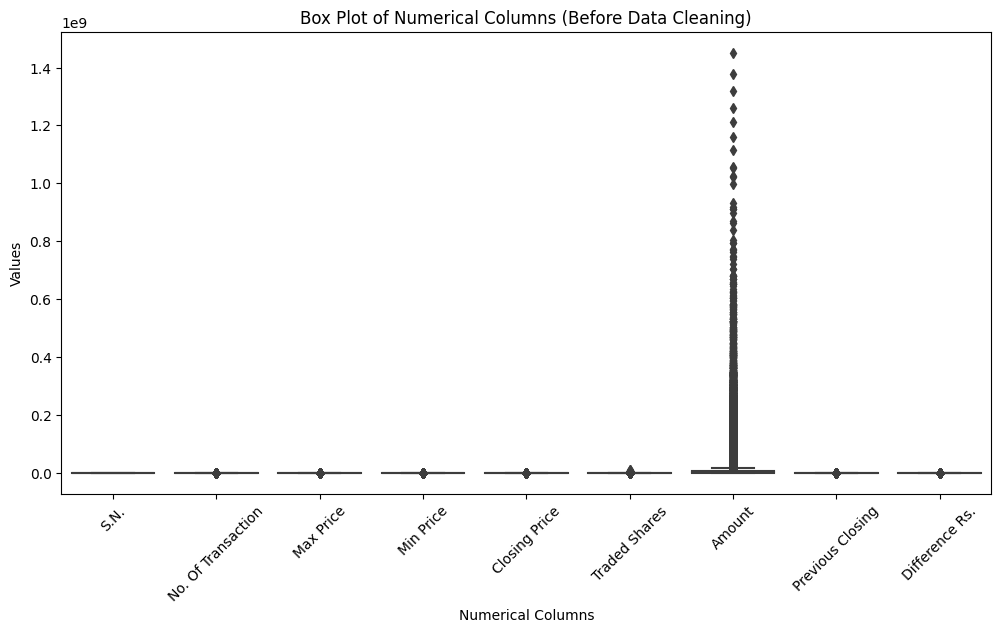

In [21]:
data_frames = []

for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    date = csv_file[:-4]
    df = pd.read_csv(file_path)
    df['Date'] = date
    data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)

# Data Visualization: Box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns (Before Data Cleaning)')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.show()







<ipython-input-15-dd0605e91495>:6: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


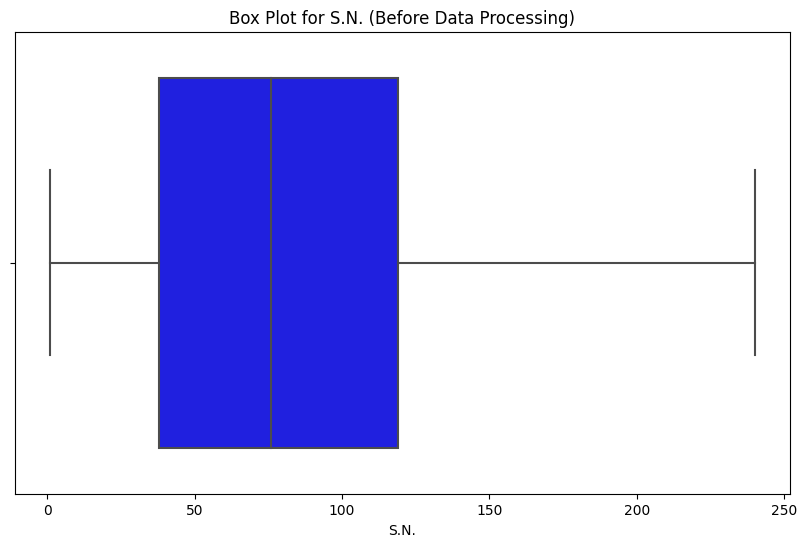

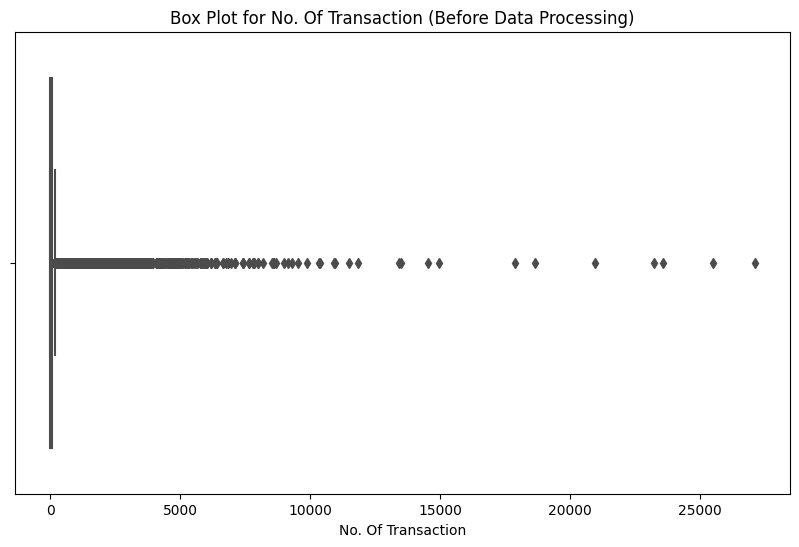

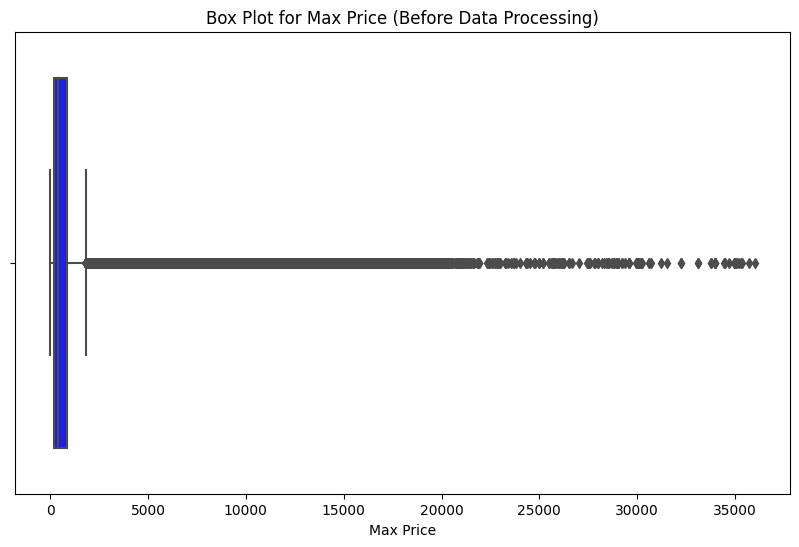

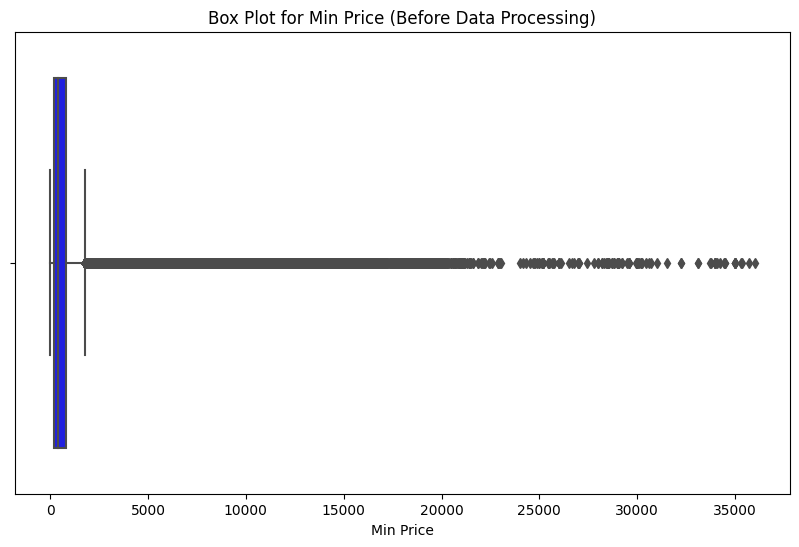

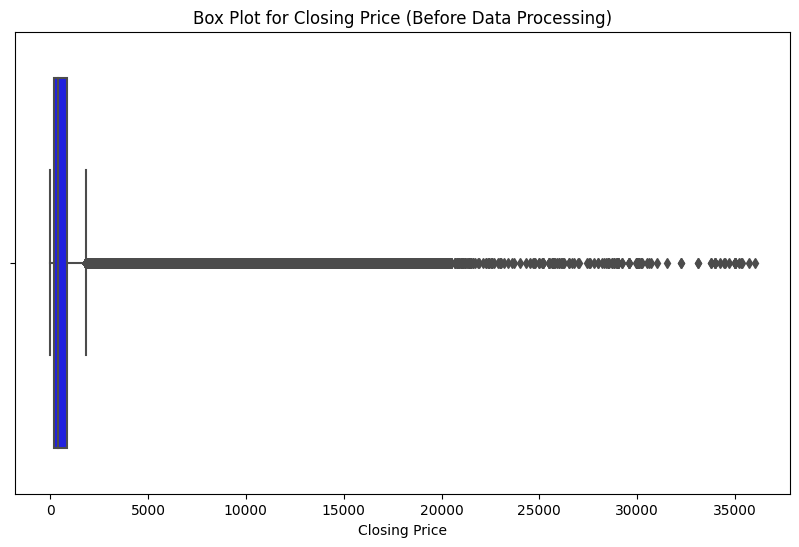

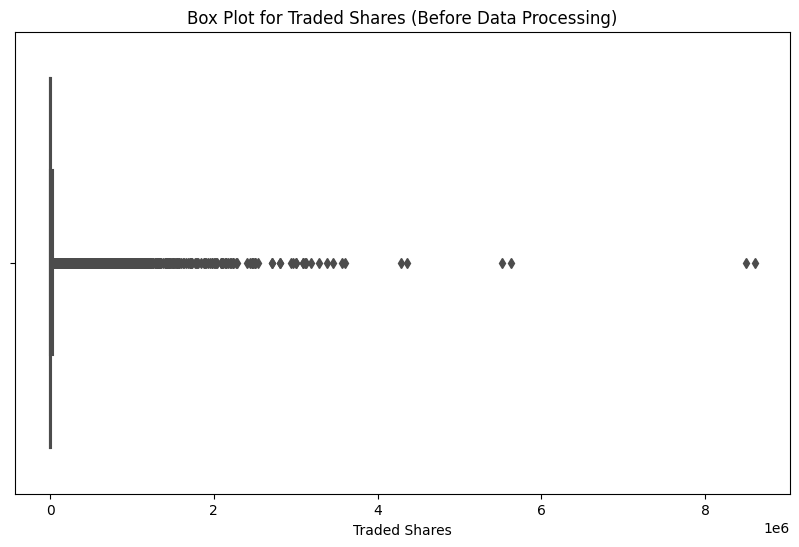

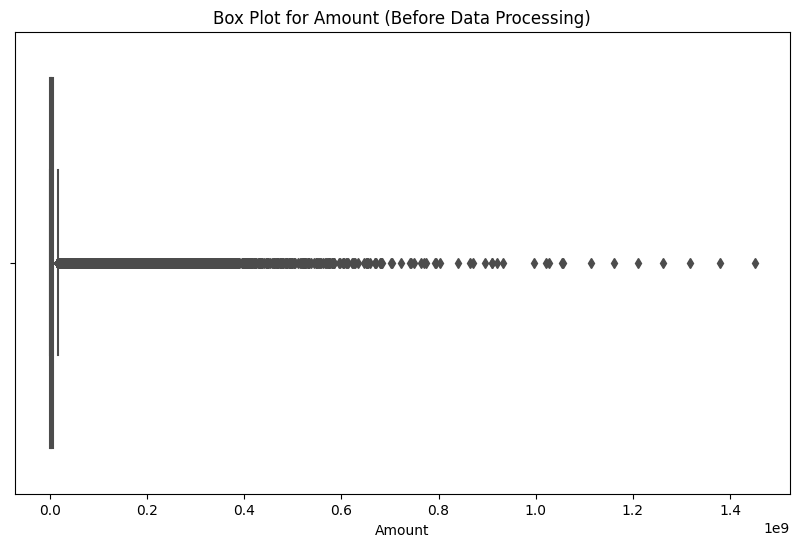

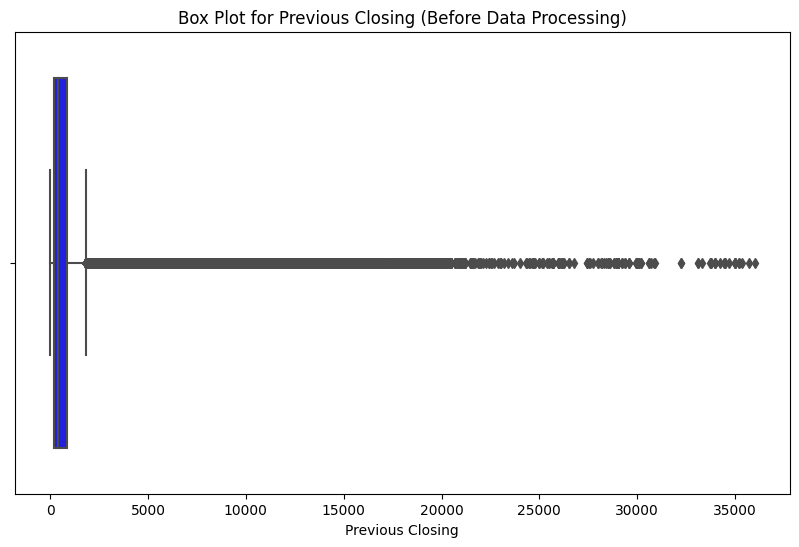

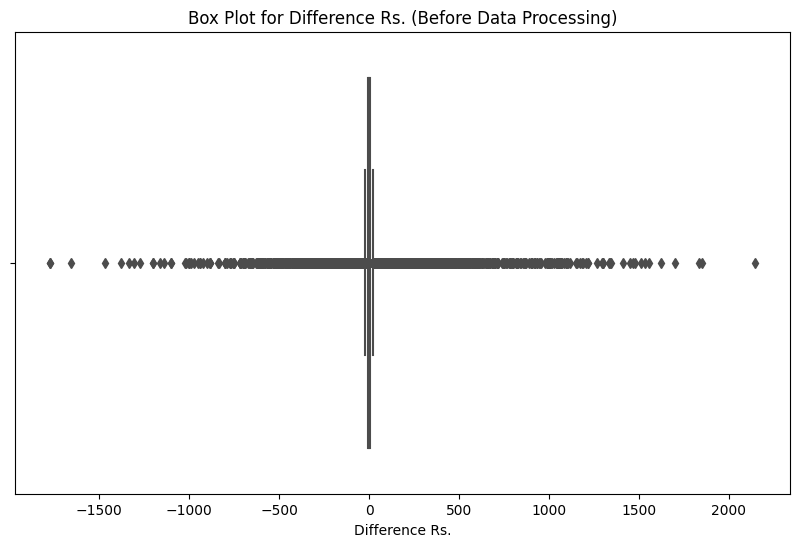

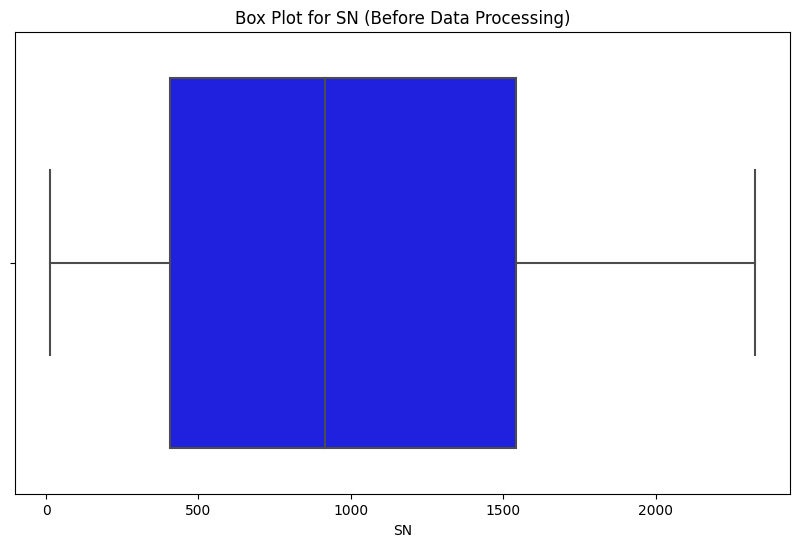

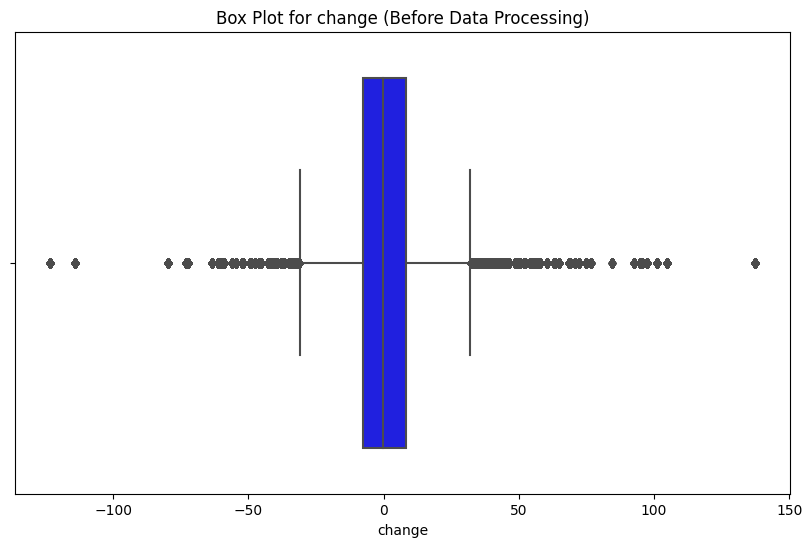

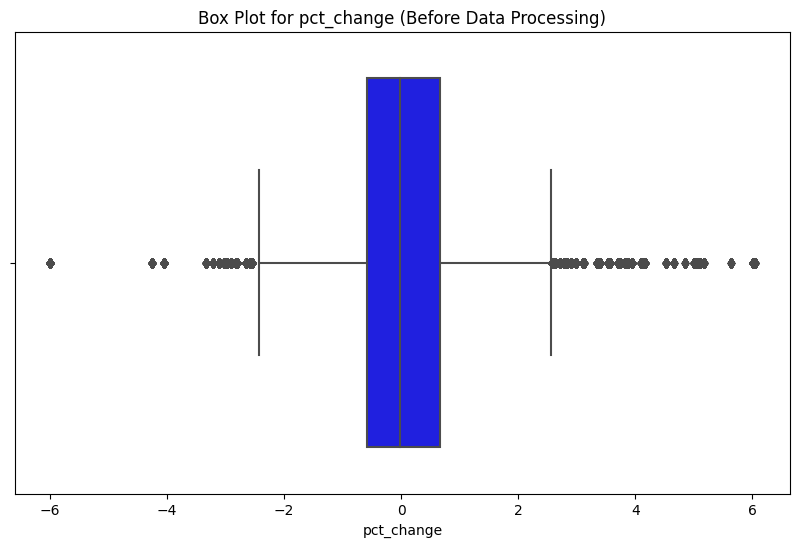

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data
merged_df = pd.read_csv('merged_data.csv')

# Get the list of numerical columns
numerical_columns = merged_df.select_dtypes(include='number').columns

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=merged_df, color='blue')
    plt.title(f'Box Plot for {column} (Before Data Processing)')
    plt.xlabel(column)
    plt.show()


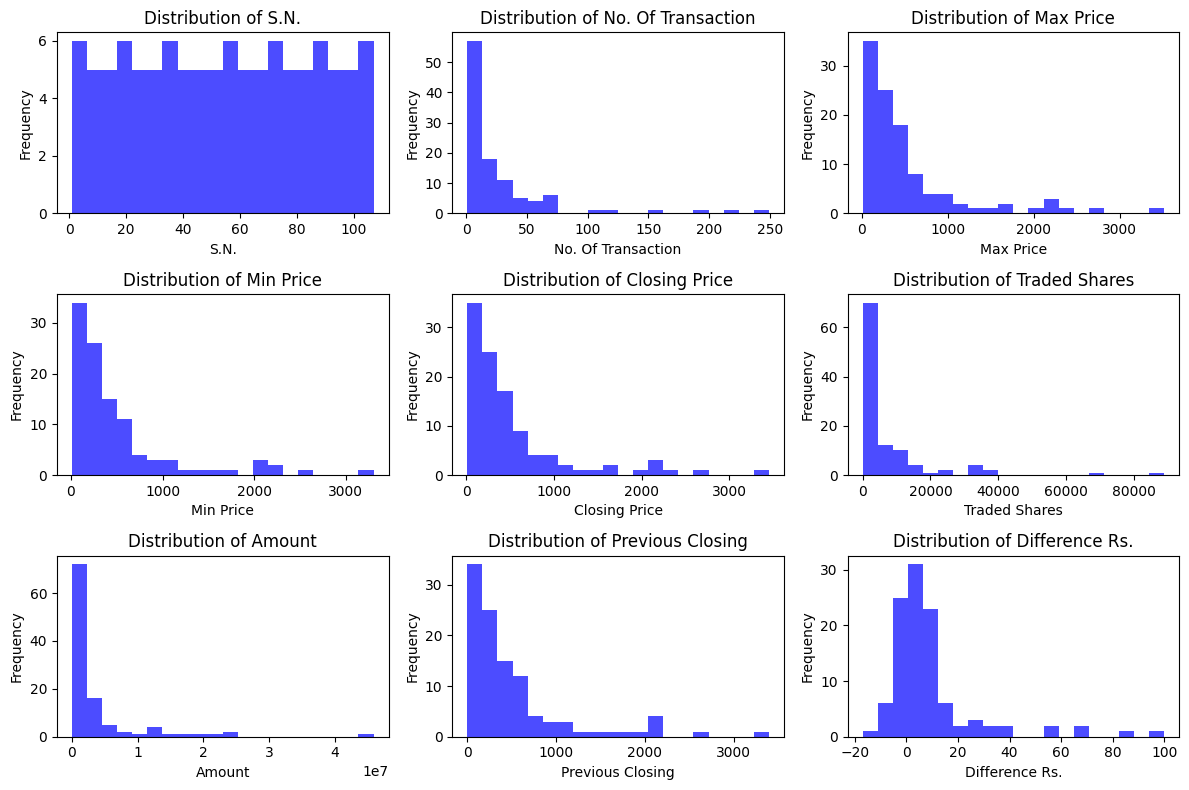

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number])


num_cols = len(numeric_columns.columns)
num_rows = (num_cols - 1) // 3 + 1
num_cols = min(num_cols, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_columns.columns):
    row, col_idx = divmod(i, num_cols)
    ax = axes[row, col_idx]
    ax.hist(numeric_columns[col], bins=20, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(num_cols * num_rows, num_cols * num_rows - num_cols + num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


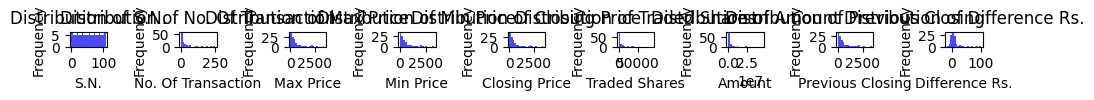

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Plot histograms for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(11, 11, i + 1)
    plt.hist(numeric_columns[col], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-12-08b94c5306d0>:7: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


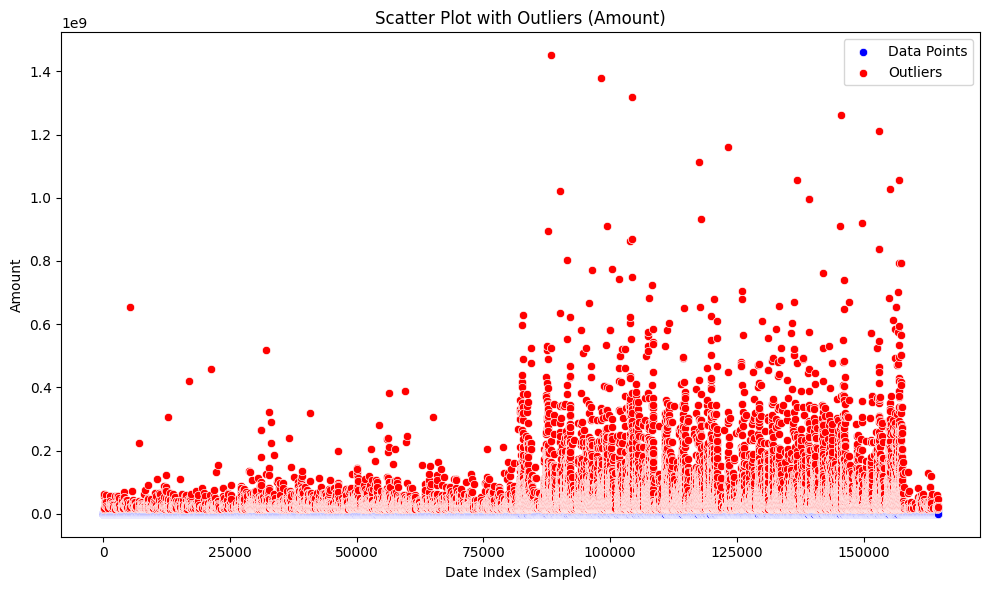

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data
merged_df = pd.read_csv('merged_data.csv')

# Specify the column and bounds for outlier detection
column_name = 'Amount'
Q1 = merged_df[column_name].quantile(0.25)
Q3 = merged_df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers based on the bounds
outliers = merged_df[(merged_df[column_name] < lower_bound) | (merged_df[column_name] > upper_bound)]

# Sample a subset of dates for plotting (adjust this as needed)
sampled_data = merged_df.sample(frac=0.2, random_state=42)  # Sample 20% of the data

# Plot a scatter plot with sampled dates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df.iloc[sampled_indices], x=sampled_indices, y=column_name, color='blue', label='Data Points')
sns.scatterplot(data=outliers, x=outliers.index, y=column_name, color='red', label='Outliers')
plt.xlabel('Date Index (Sampled)')
plt.ylabel(column_name)
plt.title(f'Scatter Plot with Outliers ({column_name})')
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset (replace 'your_data.csv' with your dataset)
data = pd.read_csv('drive/MyDrive/DataScience/Stock/company_stock_cleaned.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day as separate columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Define the features (X) and the target variable (y)
X = data.drop(columns=['Traded Companies', 'Amount', 'Date'])  # Exclude non-numeric columns
y = data['Amount']

# Define the number of folds (k)
k = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=k)

# Initialize a list to store RMSE (Root Mean Squared Error) for each fold
rmse_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train a machine learning model (e.g., RandomForestRegressor)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Calculate the average RMSE across all folds
average_rmse = sum(rmse_scores) / len(rmse_scores)

print(f'RMSE for each fold: {rmse_scores}')
print(f'Average RMSE: {average_rmse}')


RMSE for each fold: [3969858.6290900433, 2505539.6608122448, 4195752.905905662, 7229628.941674833, 6826974.576936063]
Average RMSE: 4945550.942883769


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the merged data
merged_df = pd.read_csv('merged_data.csv')

# 1. Handling Missing Values
# Identify missing values
missing_values = merged_df.isnull().sum()

# Handle missing values (replace with mean for numeric columns)
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    merged_df[column].fillna(merged_df[column].mean(), inplace=True)

# 2. Removing Duplicate Records
merged_df = merged_df.drop_duplicates()

# 3. Outlier Handling (remove outliers using z-score)
z_scores = np.abs(stats.zscore(merged_df['Closing Price']))
merged_df = merged_df[(z_scores < 3)]  # Remove outliers beyond 3 standard deviations

# 4. Data Type Consistency (convert 'date' column to datetime)
merged_df['date'] = pd.to_datetime(merged_df['date'])

# 5. Handling Categorical Data (if applicable, perform one-hot encoding)
# merged_df = pd.get_dummies(merged_df, columns=['categorical_column'])

# 6. Scaling and Normalization (if applicable)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# merged_df[['numeric_column1', 'numeric_column2']] = scaler.fit_transform(merged_df[['numeric_column1', 'numeric_column2']])

# Save the cleaned data to a new CSV file
merged_df.to_csv('cleaned_data.csv', index=False)


<ipython-input-14-a36552f1c785>:6: DtypeWarning: Columns (12,13,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_data.csv')


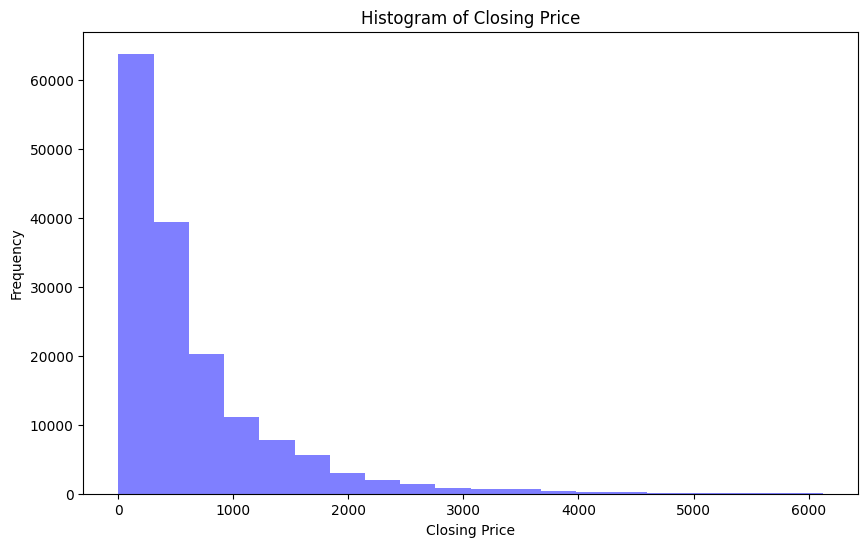

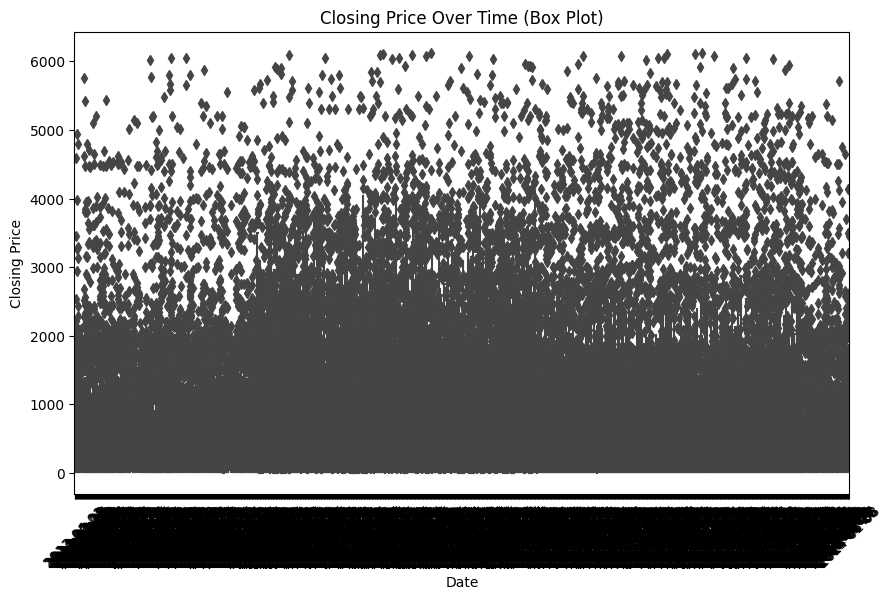

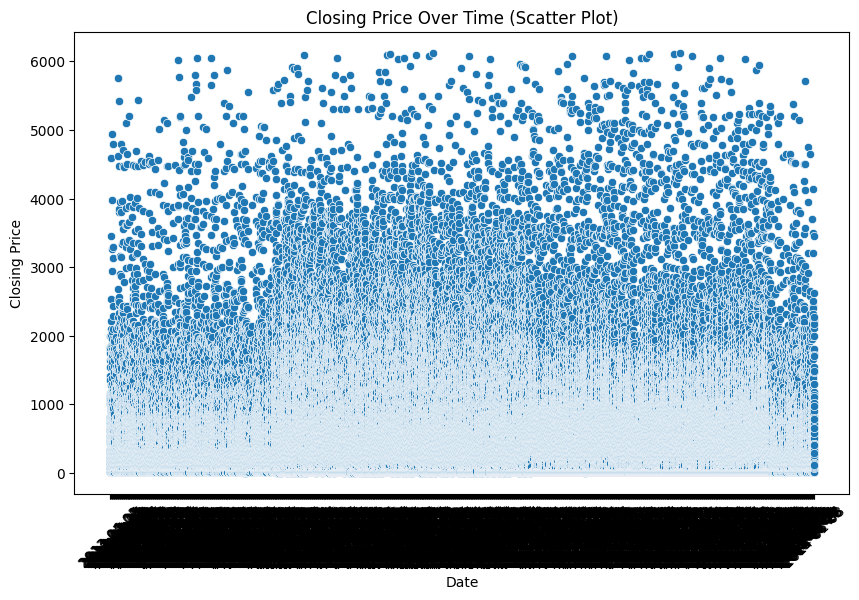

<ipython-input-15-146abd00219b>:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


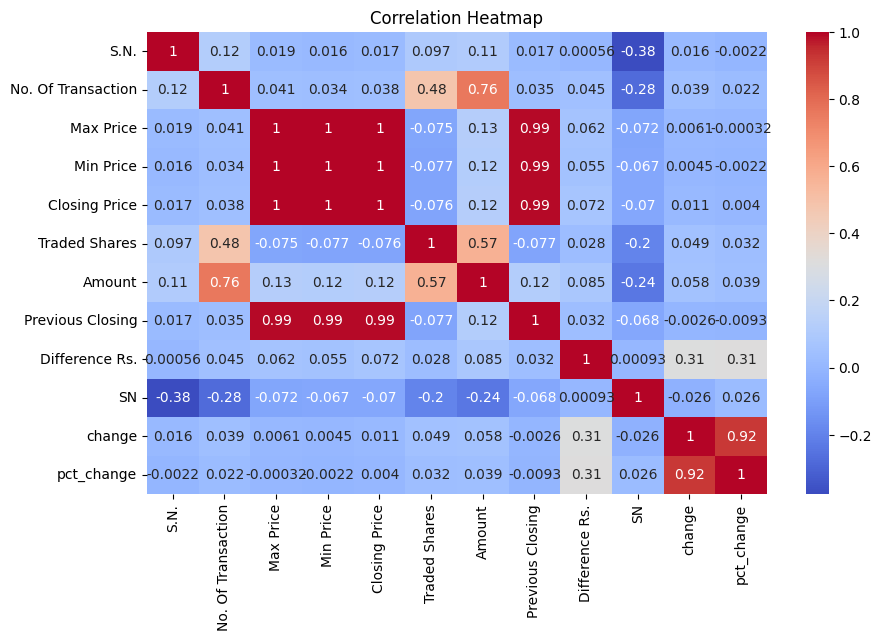

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cleaned data (replace with your cleaned data file)
merged_df = pd.read_csv('cleaned_data.csv')

# 1. Summary Statistics
summary_stats = merged_df.describe()

# 2. Data Visualization
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Closing Price'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Price')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='date', y='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time (Box Plot)')
plt.xticks(rotation=45)
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='date', y='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time (Scatter Plot)')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Analysis
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Data Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='categorical_column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categorical Column')
plt.xticks(rotation=45)
plt.show()

# 5. Outlier Handling (remove outliers using z-score)
z_scores = np.abs(stats.zscore(merged_df['Closing Price']))
merged_df = merged_df[(z_scores < 3)]  # Remove outliers beyond 3 standard deviations

# 6. Additional Analysis (Hypothesis Testing, Time Series Analysis, etc.)
# Add your specific analysis steps here.

# Save the cleaned and analyzed data (optional)
# merged_df.to_csv('cleaned_and_analyzed_data.csv', index=False)

# 7. Documentation and Reporting
# Document your findings, insights, and actions taken during EDA.

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

# Provide insights and conclusions based on your analysis.

